In [235]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow import keras
from keras.utils import normalize
from keras.layers.normalization import batch_normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras import layers, models
from keras.utils import normalize
from keras.models import load_model #save the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from scipy.fft import fft, ifft, fftfreq, fftshift
from scipy.signal import spectrogram
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint
import tikzplotlib #tikz for overleaf
from tikzplotlib import get_tikz_code, save
plt.rcParams["figure.figsize"] = (19,8)

In [55]:
data_array = np.load('signals.npy')
data_signals = pd.DataFrame(data_array)
data_signals.tail()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
4091,-0.003851,0.001195,0.007982,-0.012966,0.004403,0.007349,-0.009851,0.001605,0.011149,-0.020723,...,0.000679,0.001826,-0.001412,0.001271,-0.002132,0.002757,-0.000967,0.001609,-0.006453,0.006237
4092,-0.005092,0.002489,0.006345,-0.001891,-0.005756,0.001028,0.004487,-0.001289,0.000538,-0.001896,...,-0.000300,-0.002022,-0.000338,0.003407,0.001647,-0.004937,-0.002120,0.004025,0.004885,-0.004563
4093,-0.001577,0.002121,-0.002698,0.000250,0.001734,-0.001760,0.000729,0.001940,-0.002000,-0.000955,...,0.001621,0.000626,-0.001731,0.001129,-0.000079,-0.000186,-0.000087,-0.000947,0.001037,0.000997
4094,-0.000195,-0.002233,-0.000489,0.002429,0.000482,-0.001085,-0.001413,0.000880,0.001058,-0.000048,...,0.001396,0.000719,-0.002425,-0.000258,0.002132,-0.000082,-0.000658,-0.000585,-0.000454,0.002262
4095,-0.000375,0.000233,0.000911,-0.000094,-0.000913,-0.000753,0.000421,0.000909,0.000241,-0.000615,...,0.000334,-0.000901,0.000402,-0.000961,0.000700,0.000659,0.000015,-0.001343,0.000629,0.000124


In [56]:
signals = np.array(data_signals)

fhat = fft(signals)
#len(fhat)

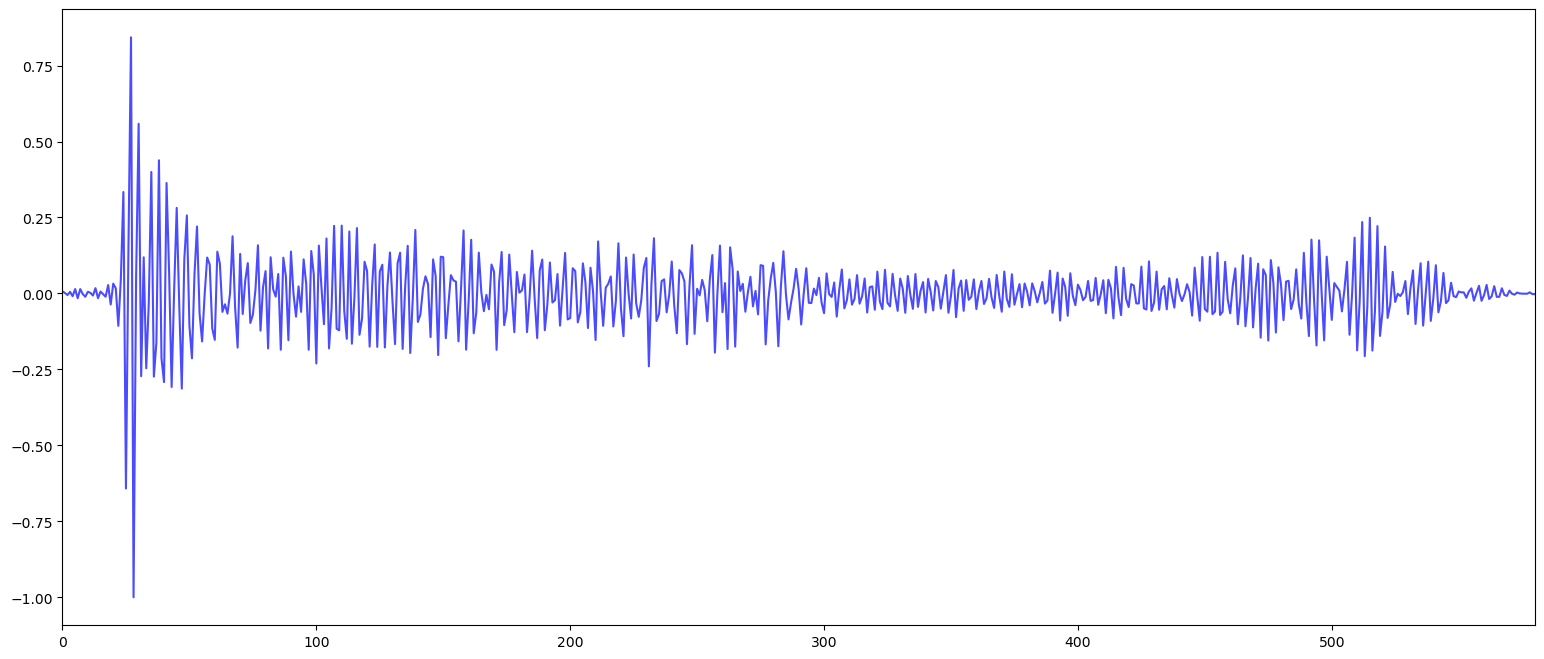

In [57]:
#Signal 15
if __name__=="__main__":
    plt.xlim(-0.05,580)
    plt.plot(signals[15],"b", alpha=0.7)
    plt.show()

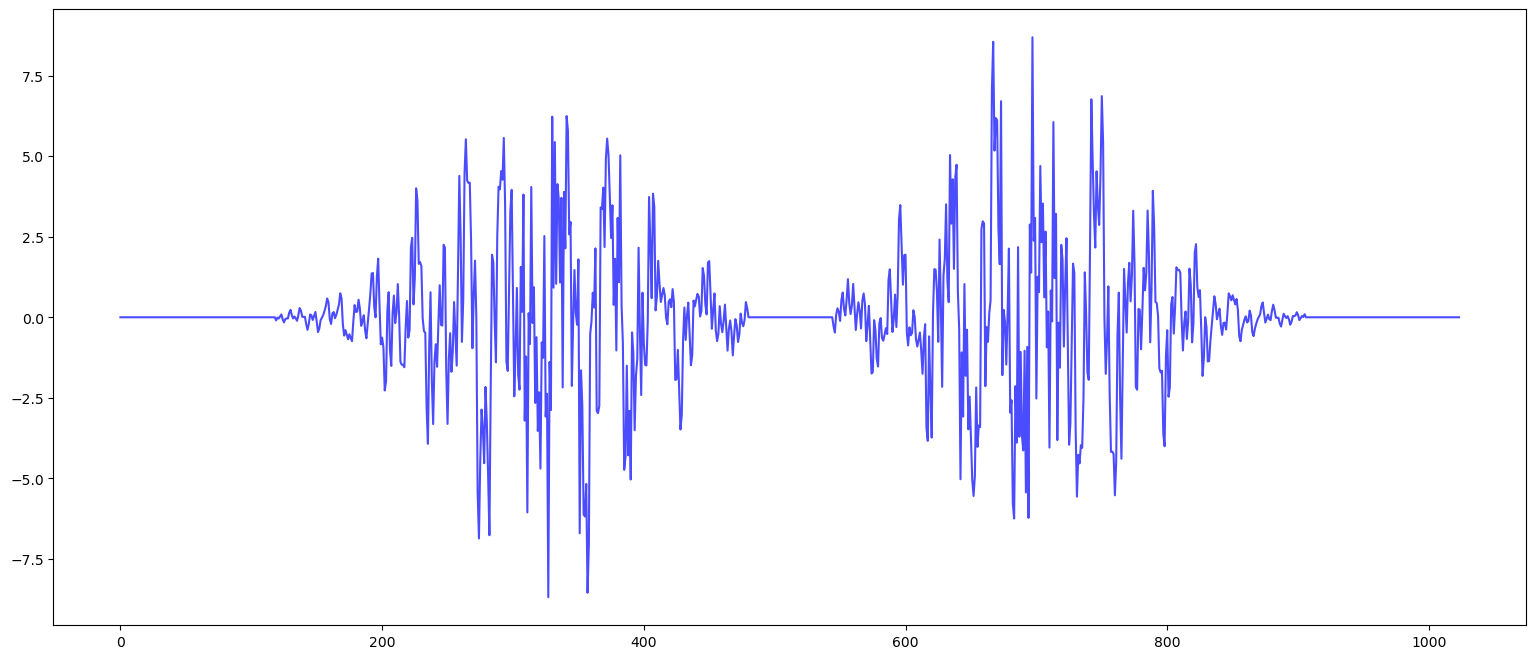

In [5]:
#Fourier Transform
#plt.plot(fhat[15].real,"b", alpha=0.7)
    
if __name__=="__main__":
    plt.plot(fhat[15].imag,"b", alpha=0.7) 
    plt.show()

--------

# $$\bullet\textbf{$\color{red}{\textbf{FFT}}$ (Fast Fourier Transform) } $$

-------
#### Data: $\{f_0,\dots,f_n\}\xrightarrow{DFT}\{\hat f_0,\dots,\hat f_n\}$
$$\hat f_k = \sum_{j=0}^{n-1}f_j\exp{\left(-i\cfrac{2\pi jk}{n}\right)}\quad \big(\mathbf{DFT}\big)$$
$$f_k = \cfrac{1}{n}\sum_{j=0}^{n-1}\hat f_j\exp{\left(i\cfrac{2\pi jk}{n}\right)}\quad \big(\mathbf{Inverse}\text{ } \mathbf{DFT}\big)$$
$w_n = e^{-2\pi i/n},$

$$\text{Using Matrices:}$$
$$\begin{bmatrix}
\hat f_0\\
\hat f_1\\
\hat f_2\\
\vdots\\
\hat f_n
\end{bmatrix} = 
\begin{bmatrix}
 1 & 1 & 1 & \dots & 1 \\
 1 & w_n & w_n^2 & \dots & w_n^{n-1}\\
 1 & w_n^2 & w_n^4 & \dots & w_n^{2(n-1)}\\
\vdots & \vdots& \vdots & & \vdots\\
 1 & w^{n-1}_{n} & w_n^{2(n-1)} & \dots & w_n^{(n-1)^2}
\end{bmatrix}
\begin{bmatrix}
 f_0\\
 f_1\\
 f_2\\
\vdots\\
 f_n
\end{bmatrix}
$$

This is the mathematical definition of DFT, practically we never have to complete this matrix-vector multiplication, we can just use the FFT.

$$\bullet\textbf{ Time complexity:}$$
$$\textbf{DFT}\to\mathcal O(n^2)$$
$$\textbf{FFT}\to \mathcal O(n\log n )$$

Let's assume that our data has a size of $n=2^k$, for some integer $k\in\mathbb N.$
We can write the above linear system as:
$$\hat f = F_n f,$$
FFT factorization:
$$\hat f = F_n f=\begin{bmatrix}
I_{n/2} & -D_{n/2}\\
I_{n/2} & -D_{n/2}
\end{bmatrix}\begin{bmatrix}
F_{n/2} & 0\\
0 & F_{n/2}
\end{bmatrix}\begin{bmatrix}
f_{\textbf{even}}\\
f_{\textbf{odd}}
\end{bmatrix},$$
Where $I_{n/2}$ is the identity  matrix, and $D_{n/2}$ is the diagonal matrix:
$$D_{n/2} = \begin{bmatrix}
1 & & & 0\\
 & w_n & & \\
 & & w_n^2 & \\
 & & & \ddots& \\
0 & & & & w_n^{n/2}\\
\end{bmatrix}$$

---------

In [6]:
file_num = ['0'*(5-len(str(x))) + str(x) for x in range(4096)]

    
def pick_value_of_GV(s): #takes GV(n) = ... num and returns the num.
    s = s[-1::-1]; val_s = ""; i = 0;
    
    if '*' in s:
        return False
    try:
        while s[i] == '.' or type(int(s[i]))==int:
            val_s += s[i];  i += 1;
            if i >= len(s): break;
    except:
        pass
    return float(val_s[-1::-1])

#pick_value_of_GV('GV( 1) =    1481.875188')    

In [7]:
data_path =  r'/Users/johnmars/Desktop/fft_cnn_paper/tmpgew3xb42/run_{}.res'

In [8]:

all_pairs = [] # G1, G2 , G3
sum_all_pairs = []
R = []

for num in file_num:      #loop over the files (4096 in total)
    data_vel = open(data_path.format(num), 'r')
    Lines = data_vel.readlines()
    
    for where,line in enumerate(Lines):
        l = line.strip()
        
        if 'R (m)' in l:
            R.append(float(Lines[where+1].strip()[:7]))
            break
    
    
    for where,line in enumerate(Lines):
        l = line.strip()
        
        if 'GROUP VELOCITIES' in l:
            Gi = lambda i: Lines[where+i].strip()
            
            all_pairs.append(((pick_value_of_GV(Gi(2)),pick_value_of_GV(Gi(3)),pick_value_of_GV(Gi(4)))))            
    
    
    sum_all_pairs.append(all_pairs)
    all_pairs = []
    

In [12]:
any_tup= lambda t: False if False in t else True
F = lambda List: list(filter(lambda x: any_tup(x),List))

just_3_vel = list(map(F,sum_all_pairs)) #all the vel but with exactly 3 values

In [18]:
if __name__=="__main__":   
    for i in range(len(just_3_vel)):
        print(f'{i}. clean data: ',len(just_3_vel[i]))
        print(f'{i}. original data: {len(sum_all_pairs[i])}\n')

        if i >= 7:
            break


0. clean data:  361
0. original data: 361

1. clean data:  361
1. original data: 361

2. clean data:  361
2. original data: 361

3. clean data:  361
3. original data: 361

4. clean data:  361
4. original data: 361

5. clean data:  361
5. original data: 361

6. clean data:  361
6. original data: 361

7. clean data:  361
7. original data: 361



In [19]:
#sum(list(map(len,just_3_vel))) #Sum of all the vel in total

In [20]:
#len(R) == len(just_3_vel)

In [21]:
invtup = lambda t: tuple(map(lambda x: 1/x, t))
tup_op = lambda tup,div: tuple(map(lambda x: x/div,tup))
#tup_op((1,2,2),10)

In [22]:
tim = [];
for i in range(len(R)):
    tim.append(list(map(lambda t: tup_op(t,R[i]) , just_3_vel[i])))

time = []
for i in range(len(R)):
    time.append(list(map(lambda t: invtup(t) , tim[i])))
    

In [24]:
time_freq = [];
P=[]; x=0;

for i in range(len(time)):
    for j in range(len(time[i])):
        for k in range(len(time[i][j])):
            P.append((time[i][j][k],30+x))
        x+=0.25;
    time_freq.append(P)
    x=0
    P=[]
    
#len(time_freq)

In [25]:
#time_freq[2]

# Polynomial Regression
## $$\mathbf{data = G\cdot \textbf{model par}}$$
# $$d_i = m_0+m_1x+m_2x^2+m^3x^3+\dots m^nx^n$$

In [26]:
#plt.scatter(*zip(*time_freq[0]),alpha=0.6,marker='.')
#plt.show()

In [27]:
#plt.scatter(*zip(*time_freq[1]),alpha=0.6,marker='.')
#plt.show()

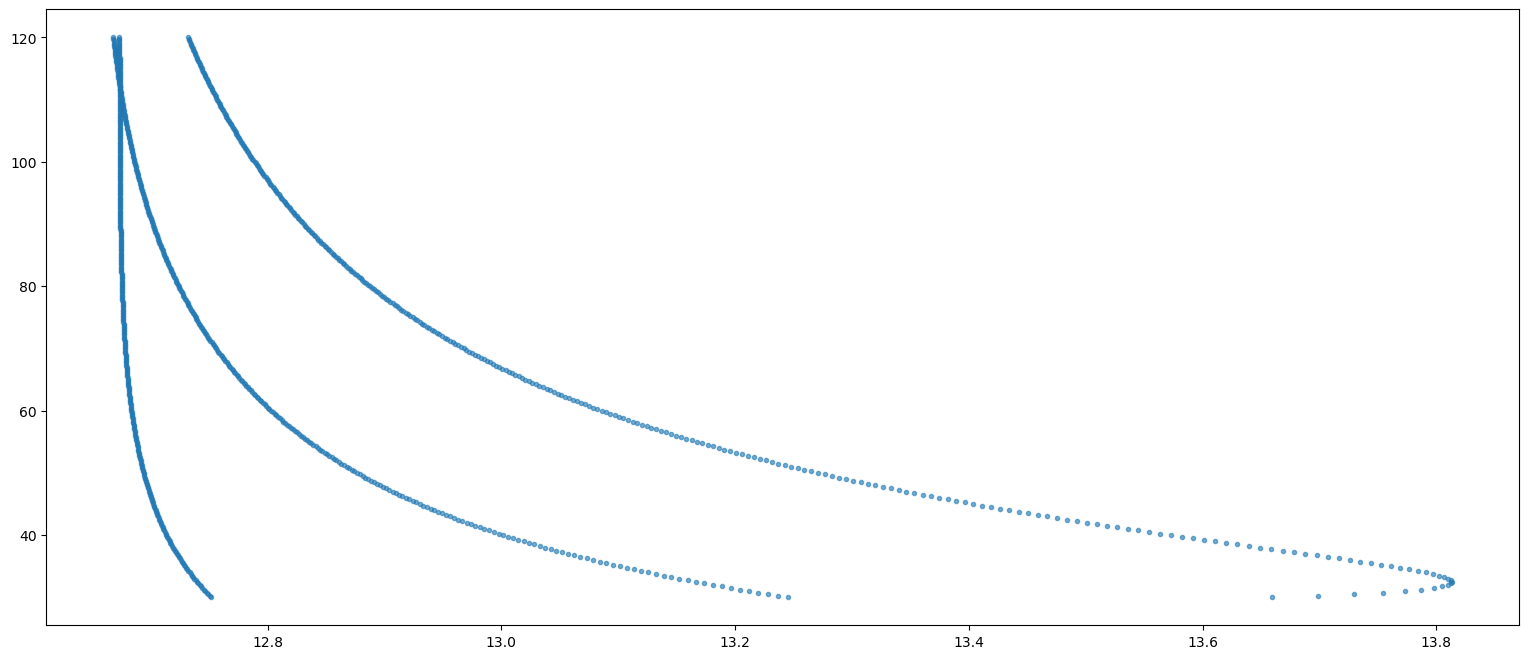

In [28]:
from sklearn.preprocessing import PolynomialFeatures

x,y = zip(*time_freq[0])
x = np.array(x)
x = np.array(list(map(lambda i: [i], x)))
y = np.array(y)
y = np.array(list(map(lambda i: [i], y)))


if __name__=="__main__":
    plt.scatter(x,y,alpha=0.6,marker='.')
    plt.show()

In [29]:
"""import statsmodels.api as sm

polynomial_features= PolynomialFeatures(degree=3)
xp = polynomial_features.fit_transform(x)
xp.shape

model = sm.OLS(y, xp).fit()
ypred = model.predict(xp) 

"""
#plt.scatter(x,ypred,marker='+',color='red')
#plt.scatter(x,y,alpha=0.3,marker='.')
#plt.show()
print()

In [30]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly_features = poly.fit_transform(x.reshape(-1, 1))

In [31]:
from sklearn.linear_model import LinearRegression

#poly_reg_model = LinearRegression()
#poly_reg_model.fit(poly_features, y)
#y_predicted = poly_reg_model.predict(poly_features)

In [32]:
#plt.scatter(x, y)
#plt.scatter(x, y_predicted, c="red")
#plt.show()

In [33]:
#poly_reg_model.intercept_

In [34]:
#poly_reg_model.coef_


In [35]:
#input: L output: [L1, L2, L3]: sumLi=L, L must be 3k
#i.e [1,-1,2,-5,0,1] --> [[1,-1],[2,-5],[0,1]]

divL3 = lambda L: [L[:int(len(L)/3)],L[int(len(L)/3):2*int(len(L)/3)],L[2*int(len(L)/3):]]

L=[1,-1,2,-5,0,1]
divL3(L)

[[1, -1], [2, -5], [0, 1]]

In [36]:
L=list(range(11+1))
divL3(L)

[[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]]

In [37]:
len(time_freq)

4096

In [38]:
TF = time_freq
#TF[0]

In [39]:
#time_freq[0]

In [40]:
##### time_freq = [list(map(lambda t: (t[1],t[0]), TF[i])) for i in range(len(TF))]

#time_freq[1]

In [41]:
# map :[1,2,3,4,5,6] -- > [[1,4],[2,5],[3,6]]

L=[1,-1,2,-5,0,1,-10,20,100] #--> [[1,-5,-10],[-1,0,20],[2,1,100]]
#L[0::3]

In [42]:
twoStepMap = lambda L: [L[0::3],L[1::3],L[2::3]]
twoStepMap(L)

[[1, -5, -10], [-1, 0, 20], [2, 1, 100]]

In [43]:
#i.e
L = [(12.751959609862647, 30),
 (13.2452845087007, 30.25),
 (13.659465792870481, 30.5),
 (12.750606454019842, 30.75),
 (13.236667400495586, 31.0),
 (13.698822445105844, 31.25),
 (12.749279735249406, 31.5),
 (13.228219915361953, 31.75),
 (13.729826380608255, 32.0),
 (12.747978781363623, 32.25),
 (13.219938521010723, 32.5),
 (13.754110246312402, 32.75),
 (12.746702964165575, 33.0),
 (13.211819648248918, 33.25),
 (13.772919849091856, 33.5)]

twoStepMap(L)[2]

[(13.659465792870481, 30.5),
 (13.698822445105844, 31.25),
 (13.729826380608255, 32.0),
 (13.754110246312402, 32.75),
 (13.772919849091856, 33.5)]

### $$\textbf{Dcurves}=\bigg[\underbrace{\big[(f_i,tmod^01),(f_i,tmod^02),(f_i,tmod^03),]}_{\text{signal 0}},\underbrace{[(f_i,tmod^11),(f_i,tmod^12),(f_i,tmod^13),\big]}_{\text{signal 1}},\dots\bigg]_{\text{sig$\to 0$}}^{\text{sig$\to 4096$}}$$

In [44]:
Dcurves = []

for i in range(len(time_freq)): #loop over all the signals
    Dcurves.append([twoStepMap(time_freq[i])])
            
len(Dcurves)

4096

In [45]:
len(Dcurves[0][0]) #signal 0 all 3mod

3

In [46]:
len(Dcurves[0][0][0]) #signal 0 mod1

361

In [47]:
#Dcurves[0][0][0]

In [48]:
"""
y,x = zip(*Dcurves[2][0][1])
x = np.array(x) ; x = np.array(list(map(lambda i: [i], x)))
y = np.array(y) ; y = np.array(list(map(lambda i: [i], y)))


plt.scatter(x,y,alpha=0.6,marker='.')
plt.show()"""
print()

In [49]:
mm,nn = zip(*Dcurves[2][0][1])


In [58]:
"""#signal=0...4096 / mode=0,1,2, deg-> degree of pol regression"""


def get_coeff_pol(signal,mode,deg,plot=None,Rsquare=None,dcurves=None):
    if dcurves==None:
        dcurves = Dcurves
        
    y,x = zip(*dcurves[signal][0][mode])
    
    t_star_max = (max(y) - 12)/2 ; t_star_min = (min(y) - 12)/2
    ###print(f't*_max:{t_star_max}, t*min:{t_star_min}')
    x = np.array(x) ; x = np.array(list(map(lambda i: [i], x))) - min(x); x = x/max(x)
    x = 30/128 + 90*x/128
    
    y = np.array(y) ; 
    ###print(f'max:{max(y)}, min:{min(y)}')
    y = np.array(list(map(lambda i: [i], y))); 
    y = y - min(y); y = y/2
    
    y = (y*(t_star_max - t_star_min) + t_star_min)/2
    

    poly = PolynomialFeatures(degree=deg, include_bias=False)
    poly_features = poly.fit_transform(x.reshape(-1, 1))
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y)
    y_predicted = poly_reg_model.predict(poly_features)
    
    coef = list(poly_reg_model.intercept_) + list(poly_reg_model.coef_[0])

    if plot in [True,1,'plot']:
        
        plt.plot(x,y_predicted,color='red',lw=4, label="estimated")
        plt.plot(x,y,'--',lw=4, label="actual")
        plt.title("$\mathbf{Dcurve}$ "+f" for signal:{signal} (mode{mode}) and poly deg->{deg}", size=16)
        plt.ylabel("$\mathbf{Time}$", size = 15)
        plt.xlabel("$\mathbf{Frequency}$", size = 15)
        plt.legend()
        plt.show()
        
    if Rsquare!=False:  
        R2 = r2_score(y, y_predicted)
        print(f'R2 = {format(R2,".5f")}')

    return np.array(coef)
    

In [59]:
#list(get_coeff_pol(k,mode,deg=5,plot=False,Rsquare=False))

In [60]:
#len(all_coeff_reg)/3

In [63]:

filted_Dcurves = []

for sig in range(len(Dcurves)):
    filted_Dcurves.append([[Dcurves[sig][0][0],
                           Dcurves[sig][0][1],
                           list(filter(lambda x: x[1]>42.5, Dcurves[sig][0][2]))]])

len(filted_Dcurves)

4096

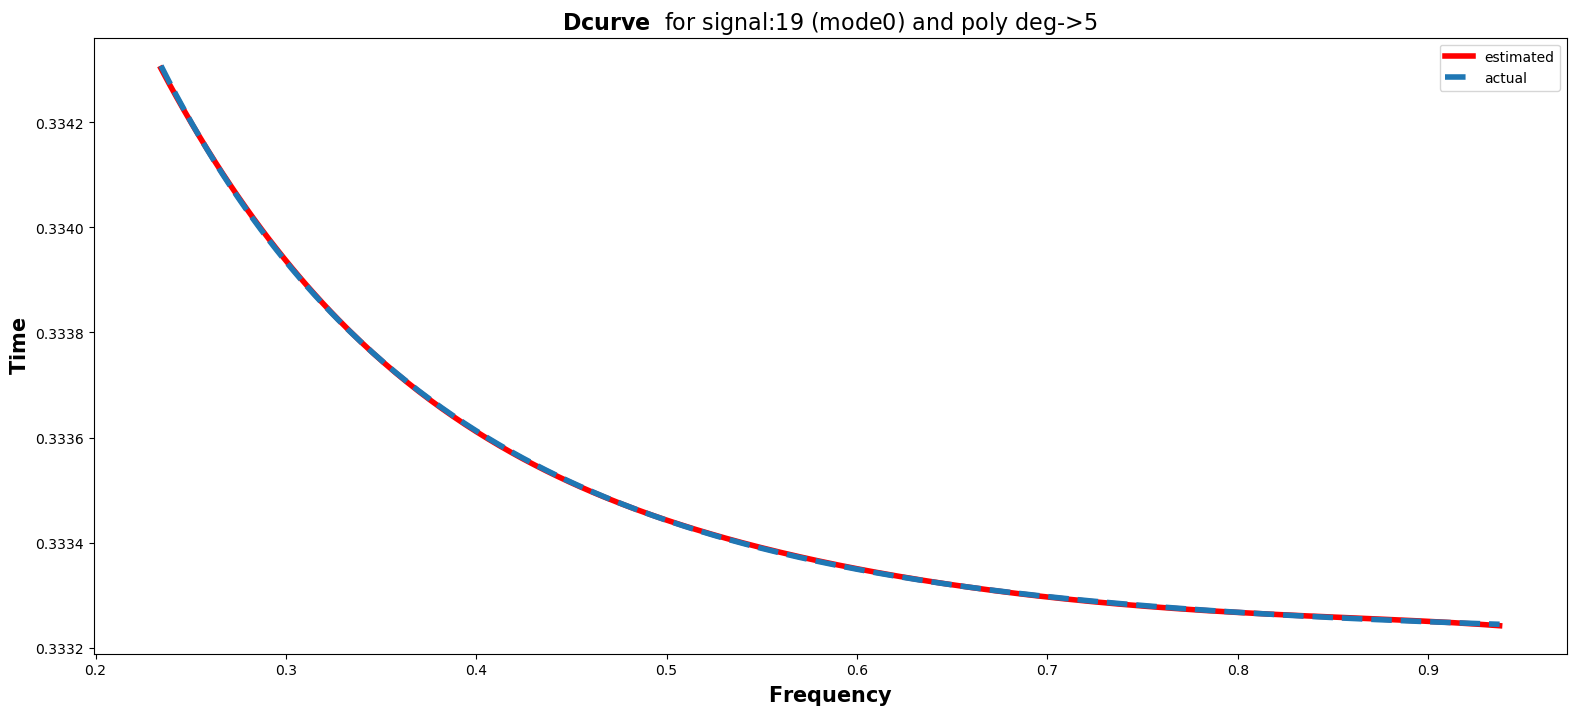

R2 = 0.99998


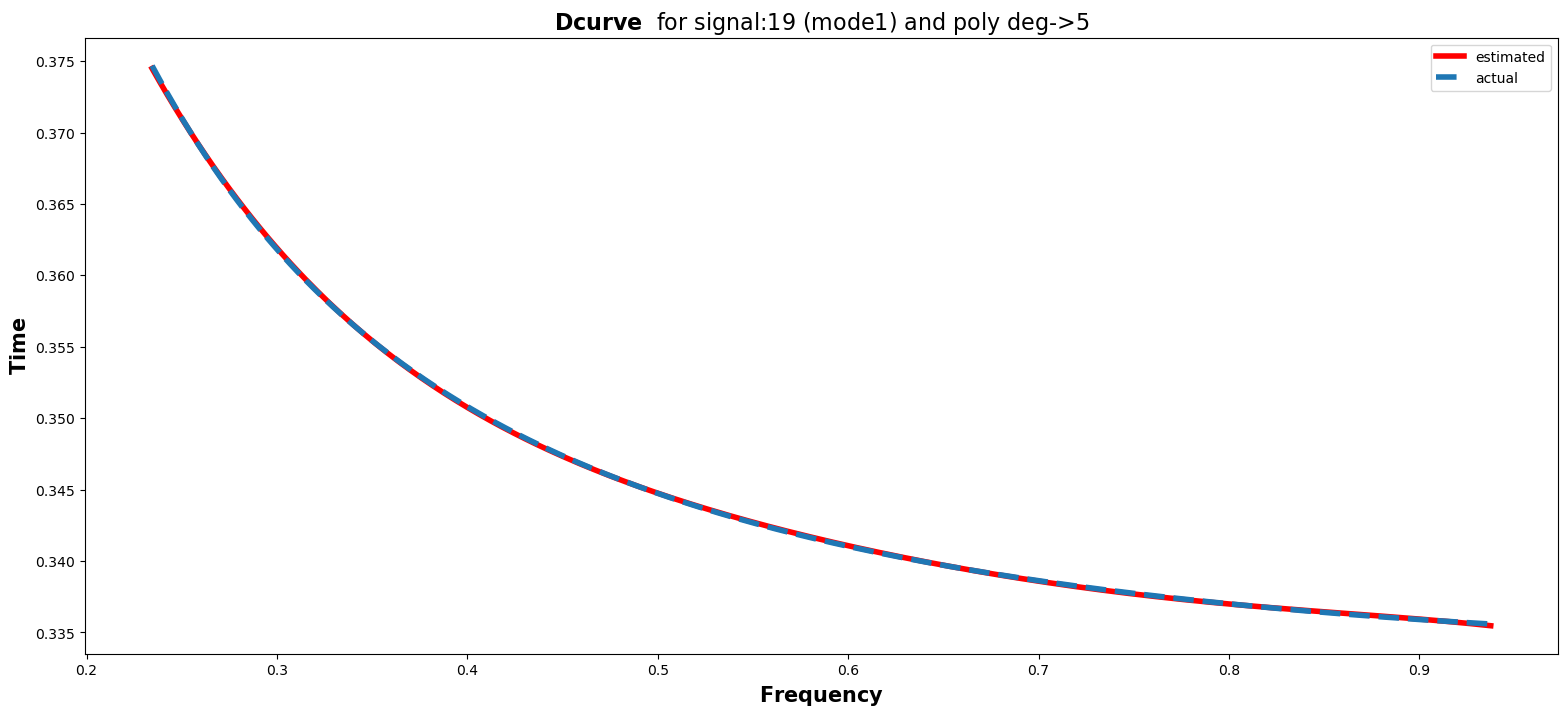

R2 = 0.99998


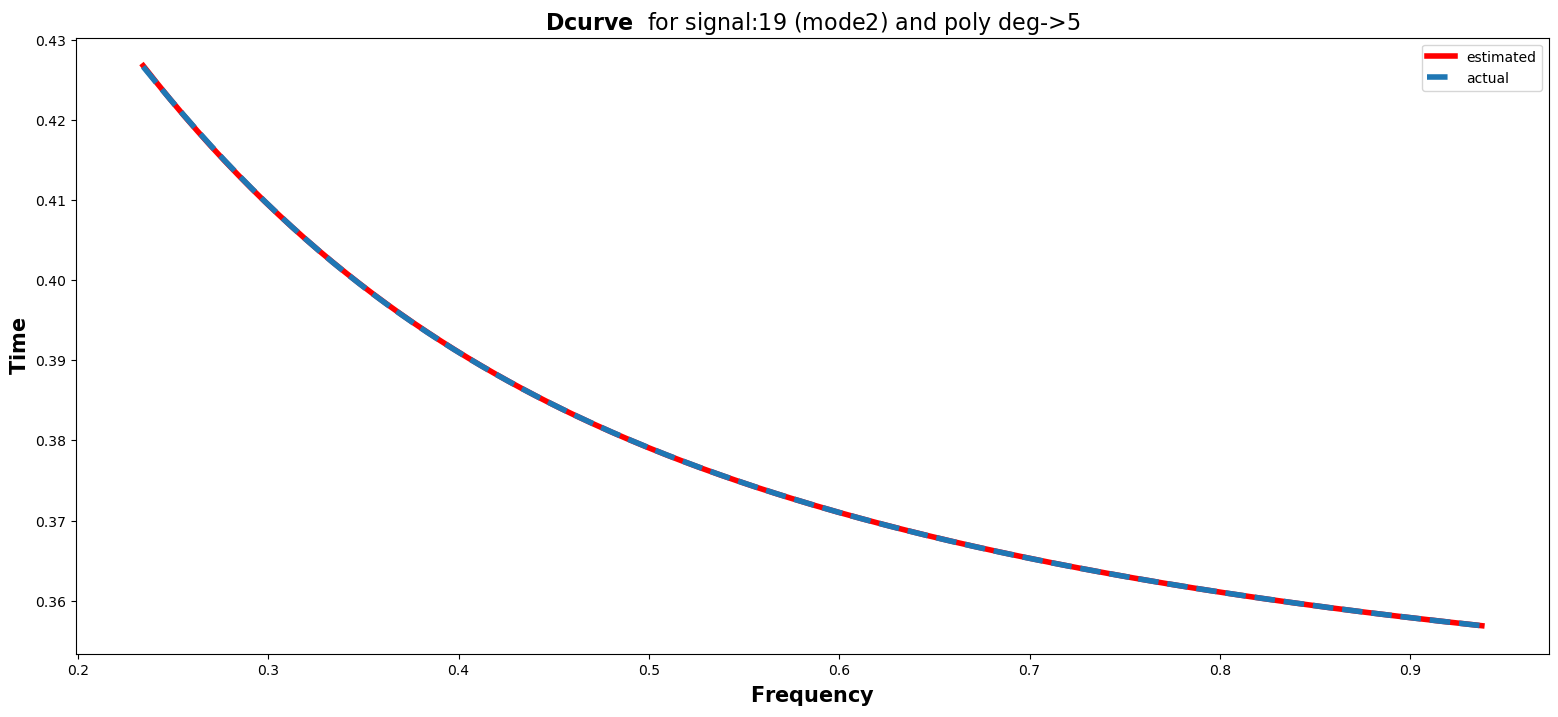

R2 = 1.00000


In [64]:
if __name__=="__main__":    
    for k in range(19,20):
        for mode in range(3):
            get_coeff_pol(k,mode,deg=5,plot=True,dcurves=filted_Dcurves)

None


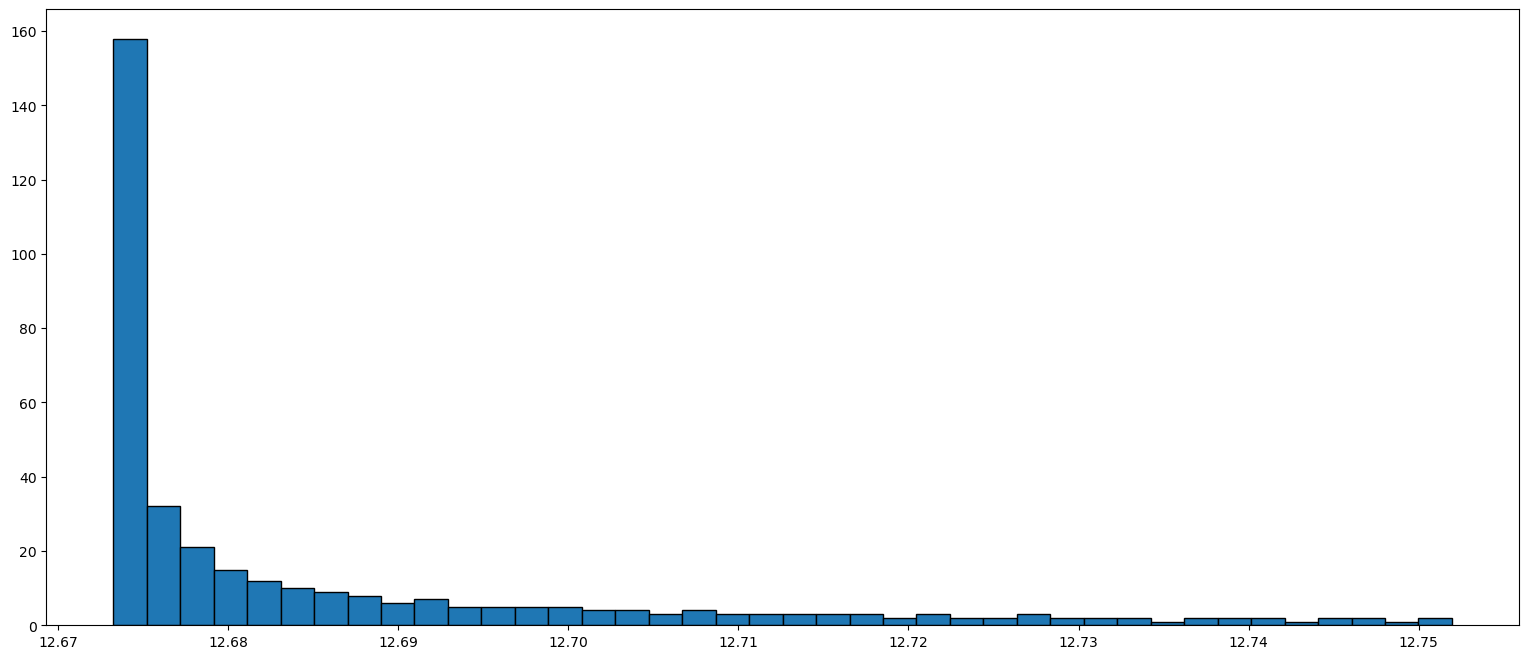

In [66]:
def hist_dcurve(sig,mode,Bins=None):
    if Bins==None:
        Bins = 28
    plt.hist(list(map(lambda x: x[0],Dcurves[0][0][0])),edgecolor='black',bins=Bins)

if __name__=="__main__":   
    print(hist_dcurve(0,0,Bins=40))

In [67]:
def reject_outliers_2(data, m=1.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d / (mdev if mdev else 1.)
    return data[s < m]

In [68]:
reject_outliers_2(np.array([1,2,3,1000,23,5,-5]))

array([2, 3])

In [69]:
def remove_outliers(data, max_deviation=3.5):
 
    median = np.median(data)
    b_value = 1.4826  # value for normal distribution
    mad = b_value * np.median(np.abs(data - median))

    if mad > 0:
        deviation = abs(data - median) / mad

        data = data[deviation <= max_deviation]
    return data 

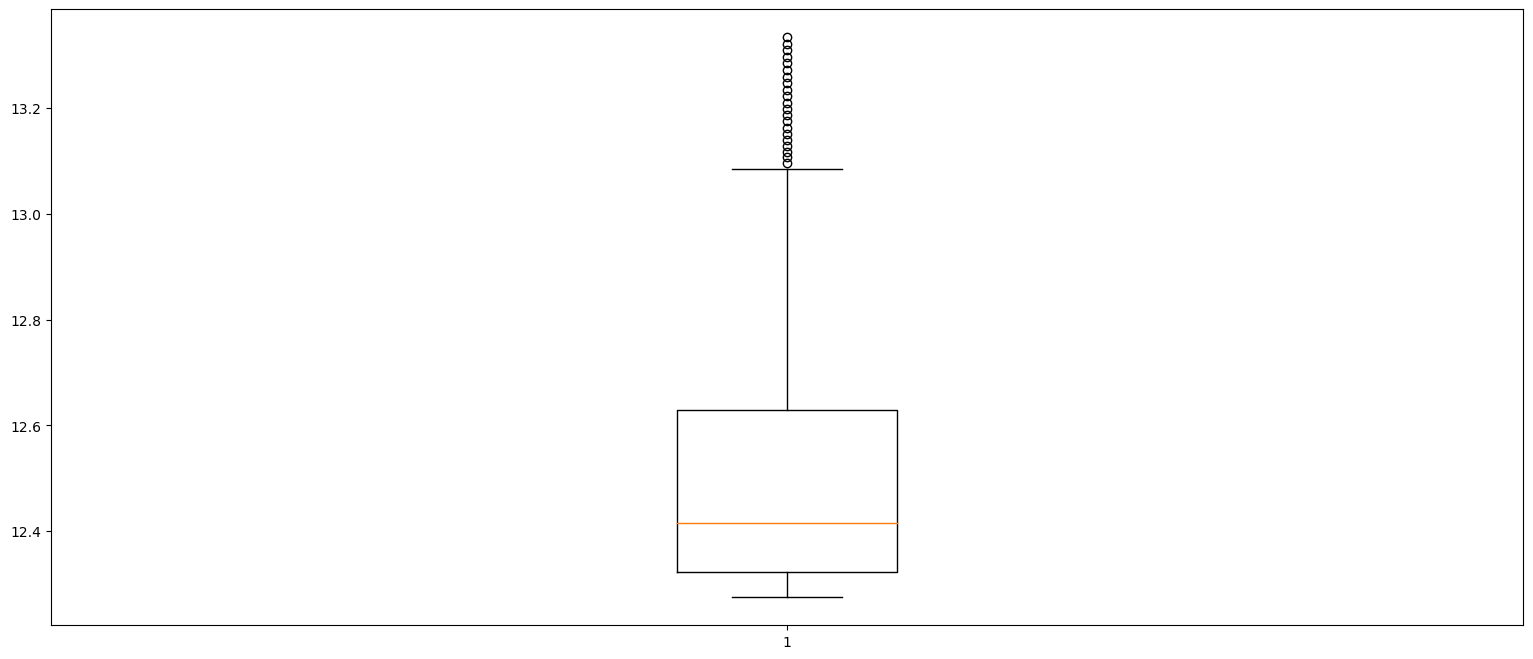

In [70]:
if __name__=="__main__":    
    plt.boxplot(list(map(lambda x: x[0], Dcurves[666][0][2])))
    plt.show()

In [71]:
def clean_points_data(data): # takes an array of points and returns it with out outliers
    rej = reject_outliers_2(np.array(list((map(lambda x: x[0], data)))))
    d_data = dict(data)
    non_outliers_data = reject_outliers_2(np.array(list((map(lambda x: x[0], data)))))
    clean_data = list(map(lambda x: (x,d_data[x]),list(non_outliers_data)))
    
    return clean_data

In [72]:
new_Dcurves = []

for sig_pointer in range(len(Dcurves)):
    new_Dcurves.append([[clean_points_data(Dcurves[sig_pointer][0][0]),
                        clean_points_data(Dcurves[sig_pointer][0][1]),
                        clean_points_data(Dcurves[sig_pointer][0][2])]])
        


In [73]:
len(new_Dcurves)

4096

In [74]:
len(new_Dcurves[0][0])

3

In [75]:
#new_Dcurves[0][0][0]

In [76]:
#clean_points_data(Dcurves[0][0][0])

In [77]:
len(reject_outliers_2(np.array(list((map(lambda x: x[0], Dcurves[666][0][2]))))))

180

In [78]:
len(np.array(list((map(lambda x: x[0], Dcurves[666][0][2])))))

361

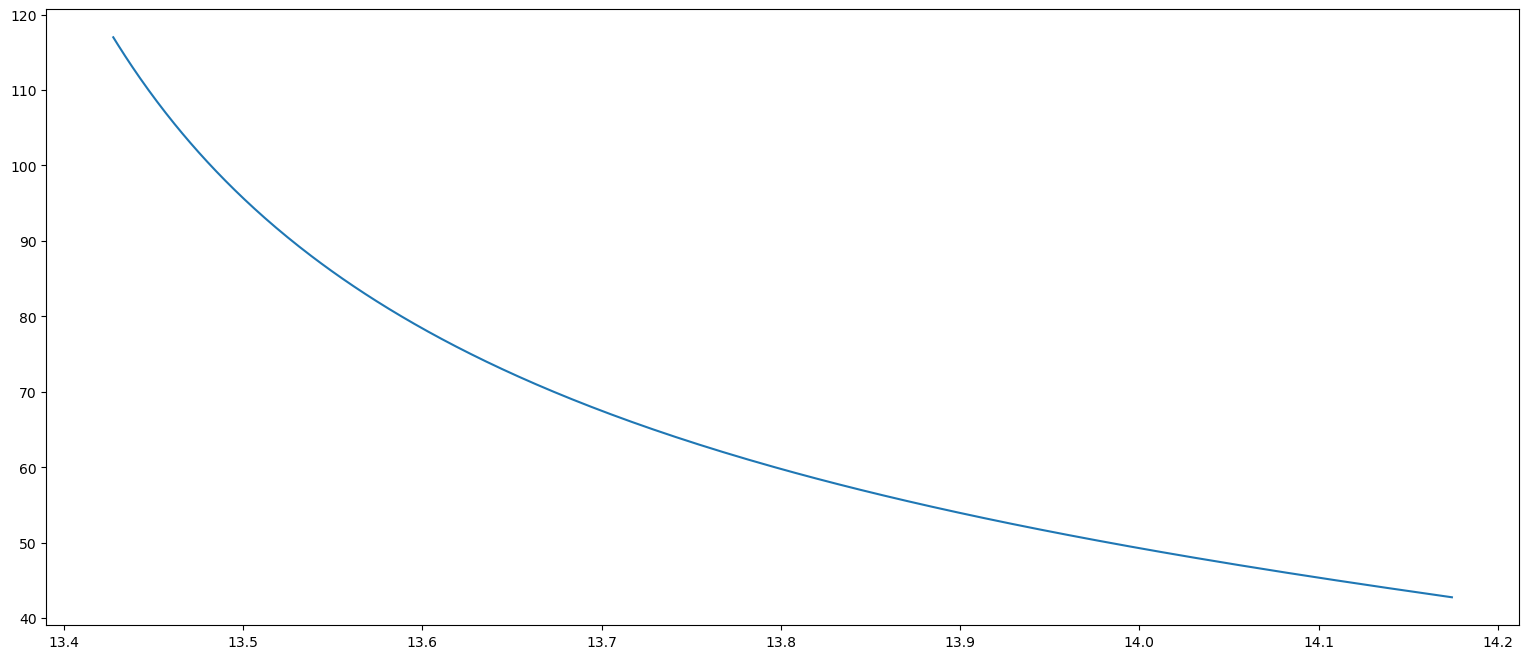

In [79]:
if __name__=="__main__":   
    plt.plot(*zip(*filted_Dcurves[19][0][2]))
    plt.show()

In [80]:
len(Dcurves[19][0][2])

349

In [81]:
len(new_Dcurves[19][0][2])

174

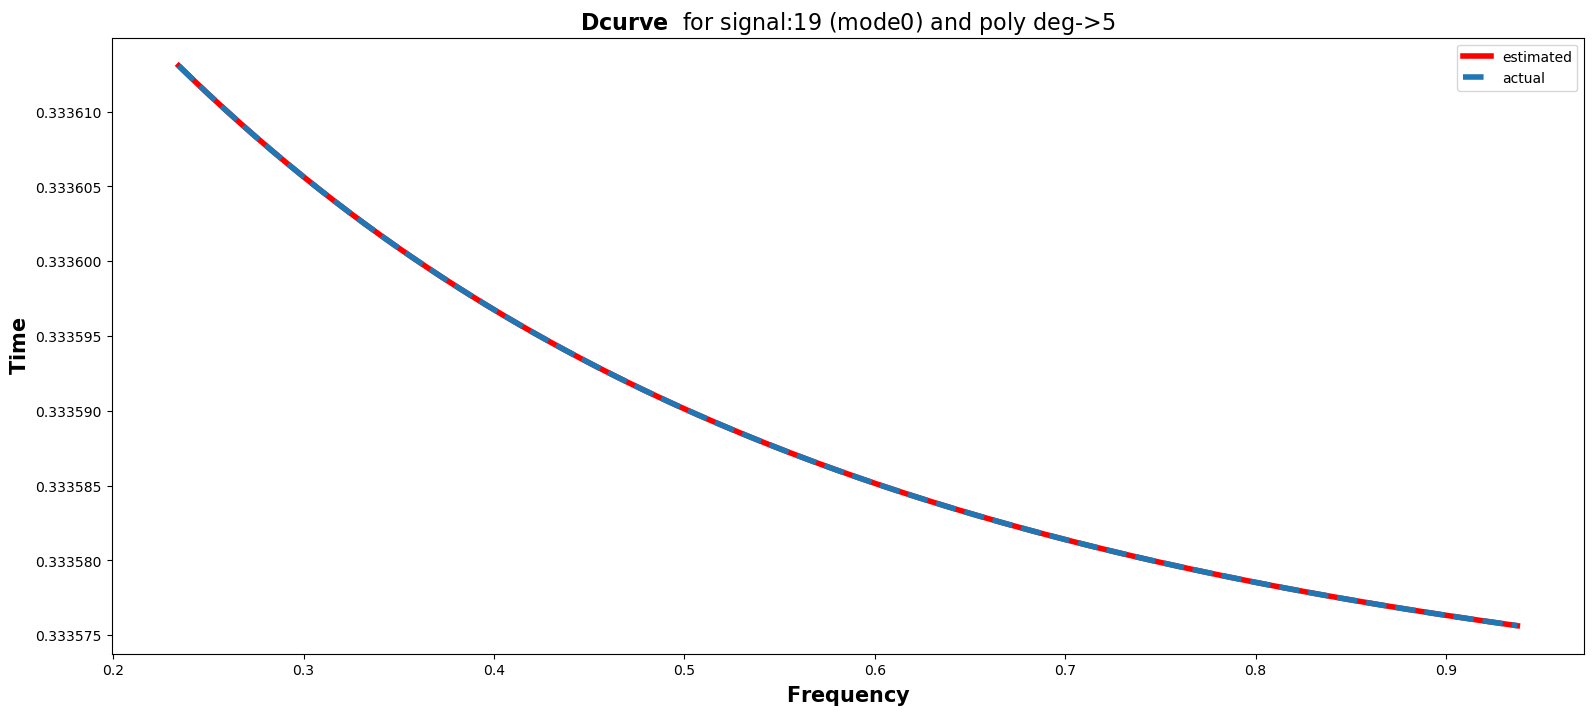

R2 = 1.00000


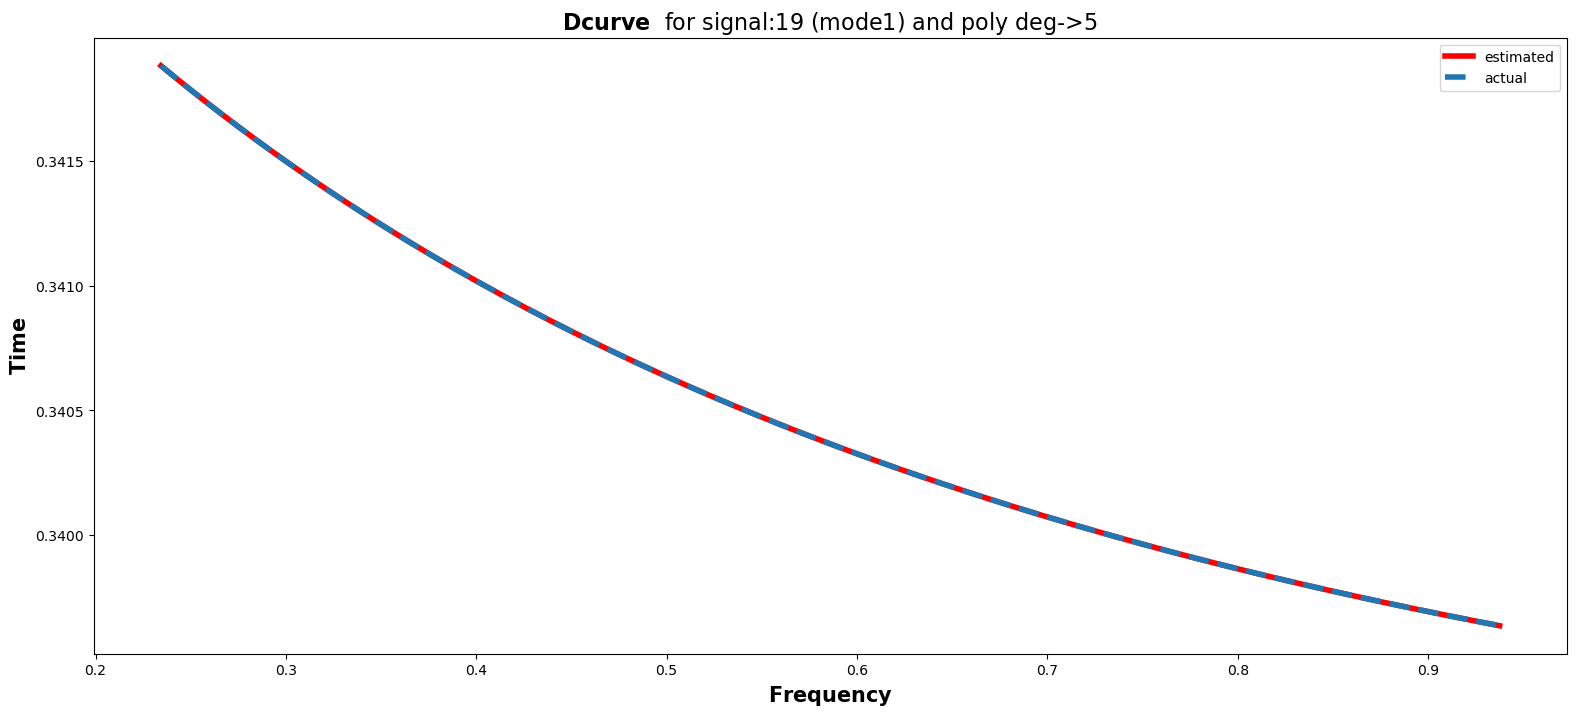

R2 = 1.00000


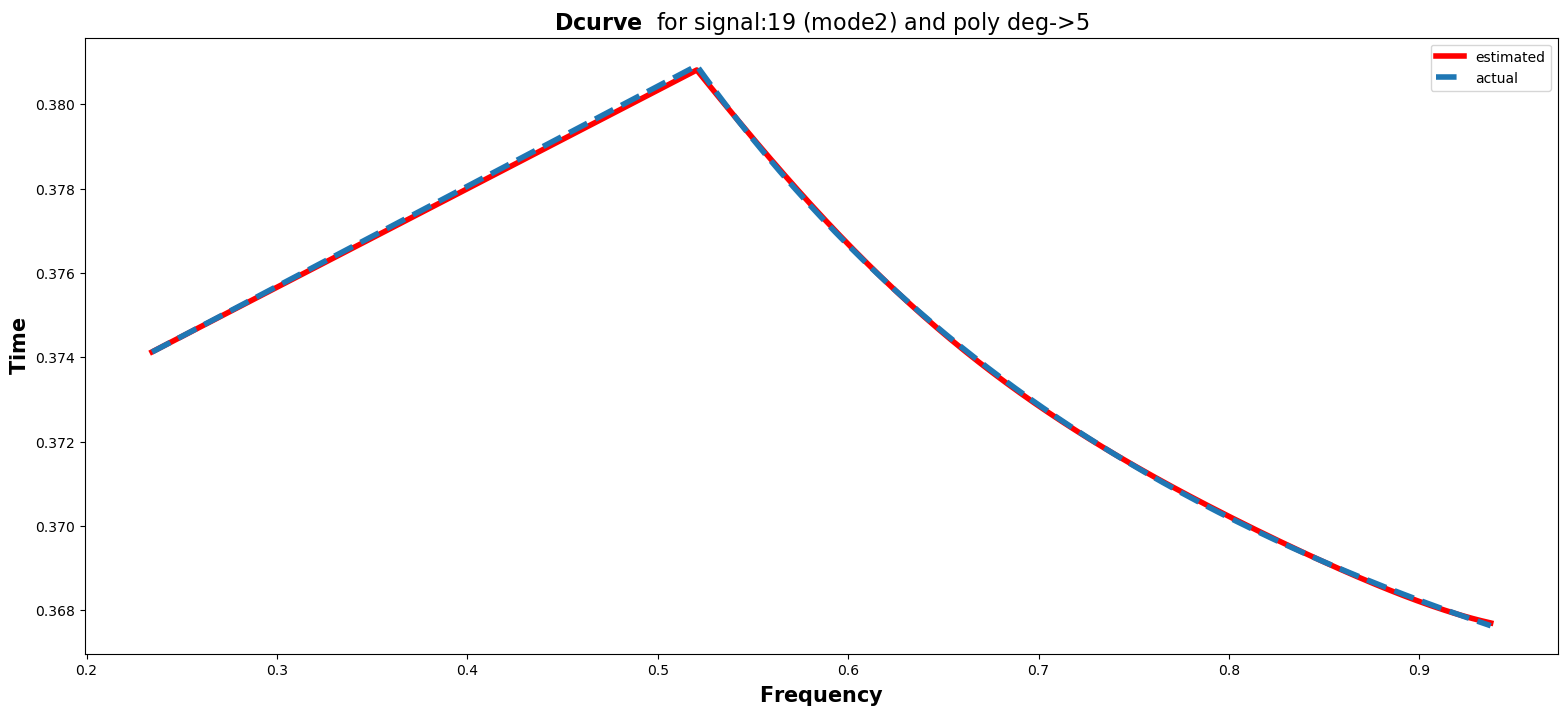

R2 = 0.99995


In [82]:
if __name__=="__main__":
    for k in range(19,20): #### Overfitting
        for mode in range(3):
            get_coeff_pol(k,mode,5,plot=True,dcurves=new_Dcurves)

In [83]:
my_filter = lambda L: list(filter(lambda x: x[1]>0, L))

In [84]:
"""filted_Dcurves = []

for sig in range(len(Dcurves)):
    filted_Dcurves.append([list(map(my_filter,Dcurves[i][0]))])

len(filted_Dcurves)"""



filted_Dcurves = []

for sig in range(len(Dcurves)):
    filted_Dcurves.append([[Dcurves[sig][0][0],
                           Dcurves[sig][0][1],
                           list(filter(lambda x: x[1]>42.5, Dcurves[sig][0][2]))]])

len(filted_Dcurves)

4096

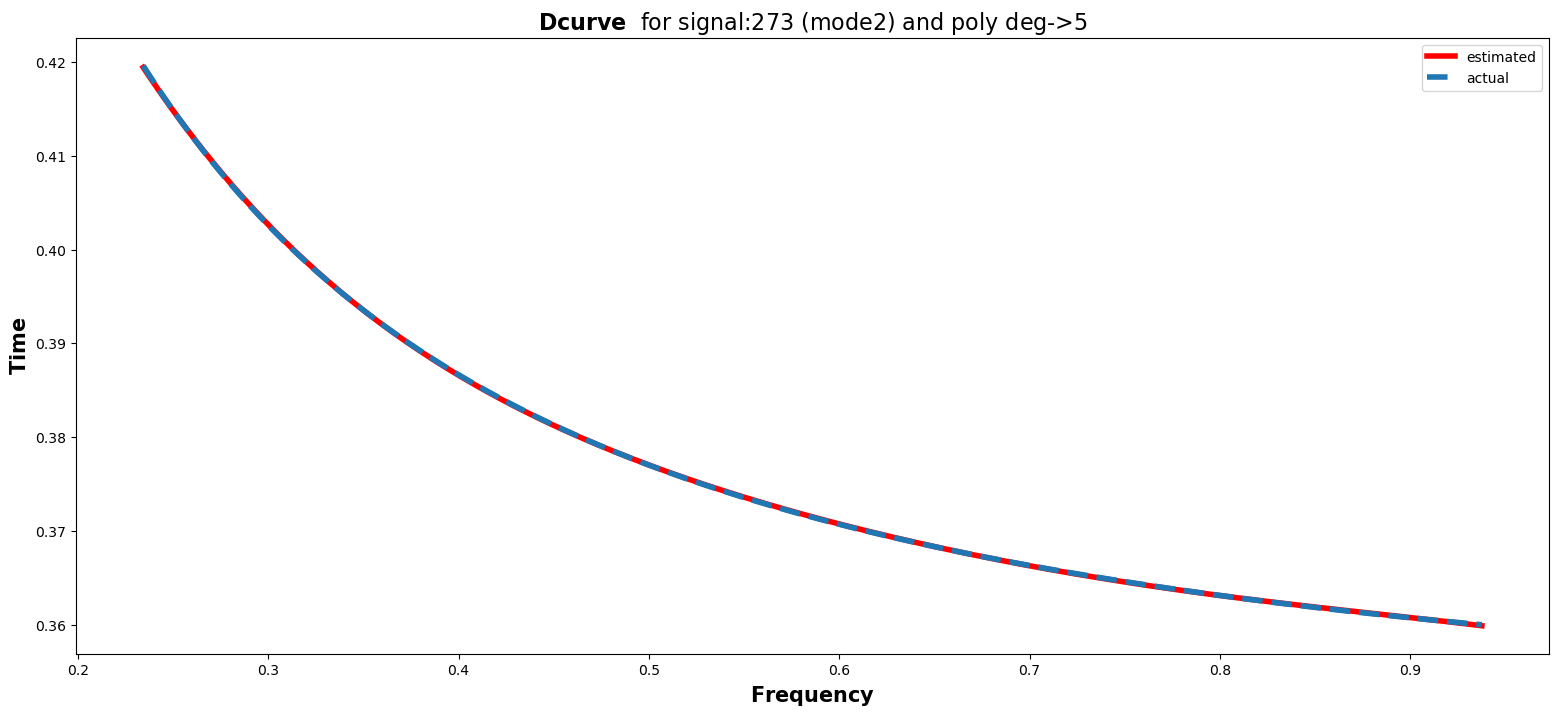

R2 = 0.99999


In [421]:
if __name__=="__main__":
    get_coeff_pol(randint(0,4097),2,deg=5,plot=True,dcurves=filted_Dcurves)

In [88]:
len(Dcurves[19][0][2])-len(filted_Dcurves[19][0][2]) # -15 points for mod3 but 0 for the others

51

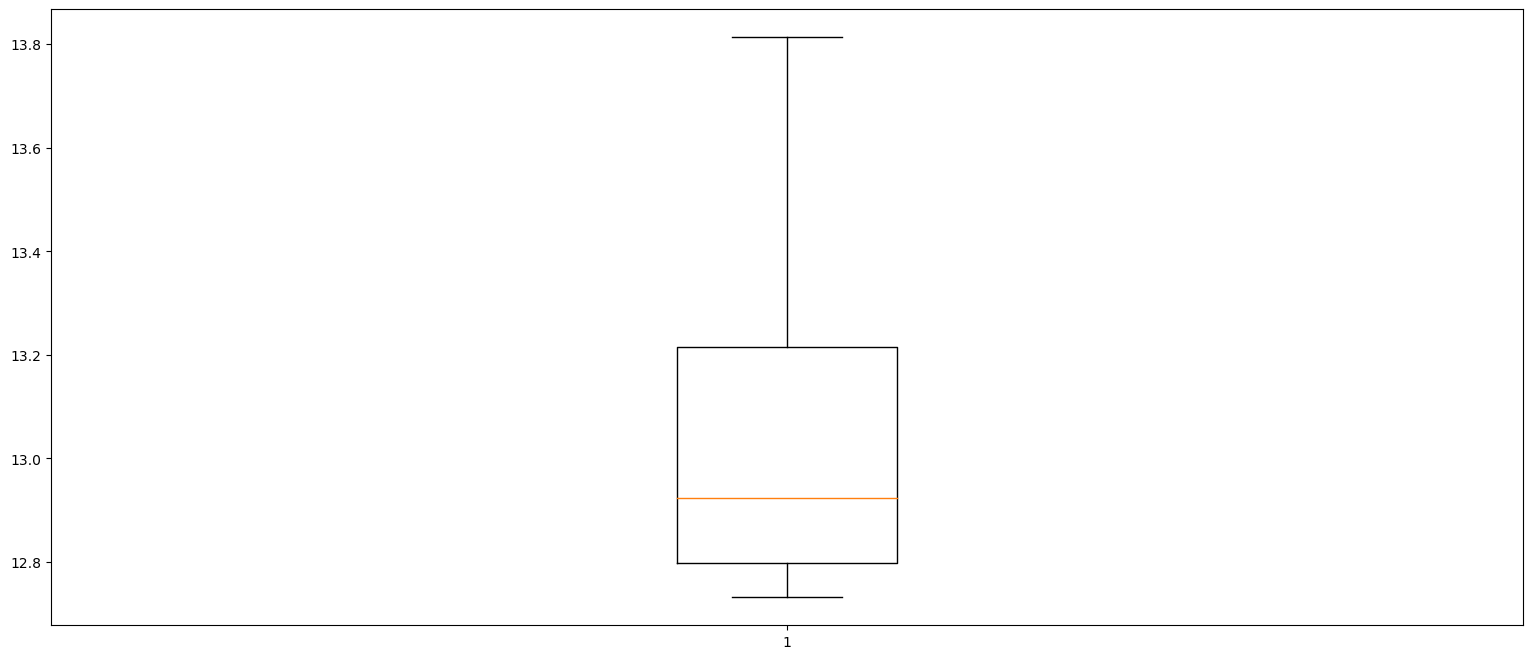

In [91]:
plt.boxplot(list(map(lambda x: x[0], Dcurves[0][0][2])))
plt.show()

# $$Splines$$

In [92]:
from scipy.interpolate import CubicSpline

x = sorted(list(map(lambda x: x[0],filted_Dcurves[0][0][0])))
y = list(map(lambda x: x[1],filted_Dcurves[0][0][0]))


f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(min(x), max(x), 100)
y_new = f(x_new)

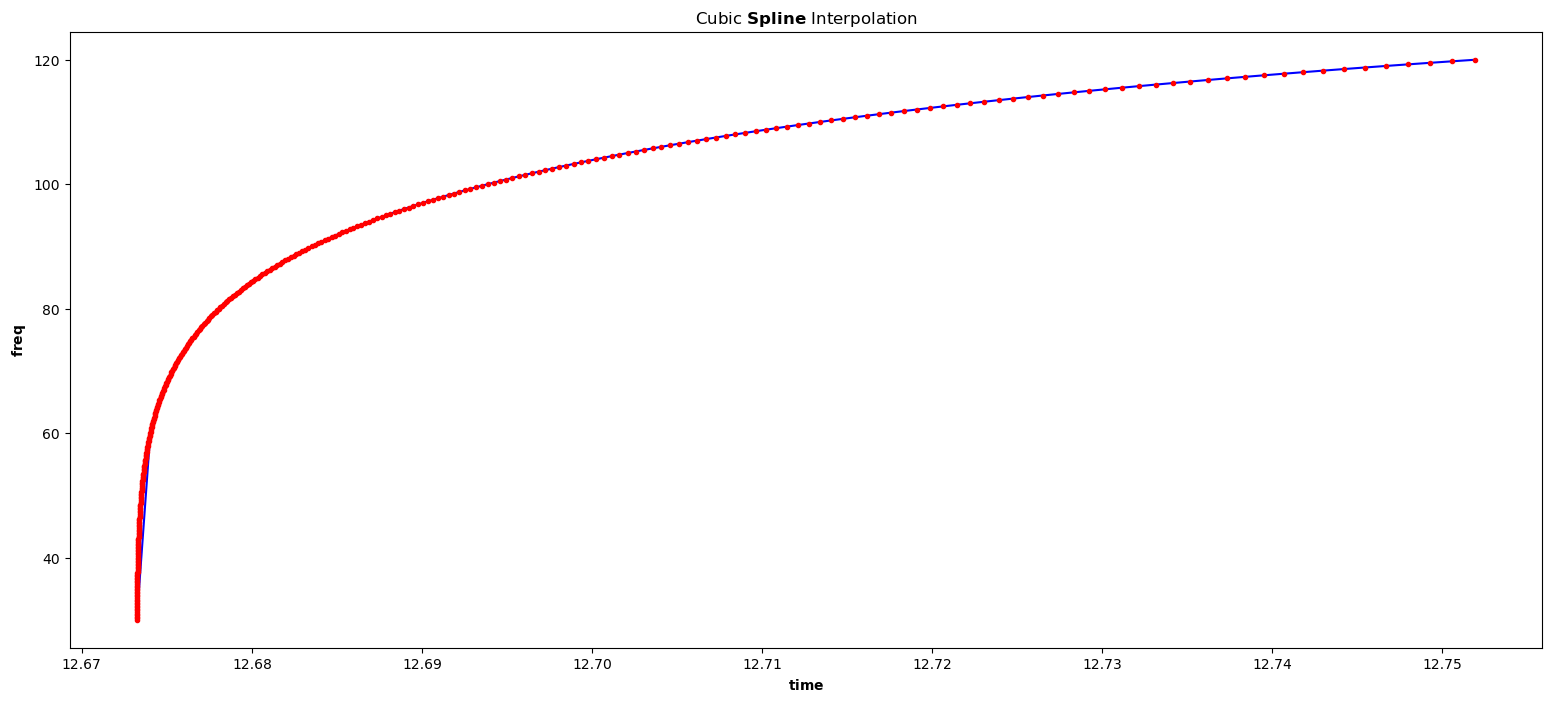

In [93]:
plt.plot(x_new, y_new, 'blue')
plt.plot(x, y, 'r.')
plt.title('Cubic $\mathbf{Spline}$ Interpolation')
plt.xlabel('$\mathbf{time}$')
plt.ylabel('$\mathbf{freq}$')
plt.show()

In [94]:
from sklearn.preprocessing import SplineTransformer
X = np.array(list(map(lambda x: x[0],filted_Dcurves[0][0][0]))).reshape(len(filted_Dcurves[0][0][0]), 1)
spline = SplineTransformer(degree=5, n_knots=4)
if __name__=="__main__":
    print(spline.fit_transform(X))

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.50000000e-01
  2.16666667e-01 8.33333333e-03]
 [0.00000000e+00 0.00000000e+00 3.03765002e-09 ... 5.48672331e-01
  1.95646627e-01 6.39528153e-03]
 [0.00000000e+00 0.00000000e+00 9.25488491e-08 ... 5.44812024e-01
  1.76014611e-01 4.86306914e-03]
 ...
 [8.33047680e-03 2.16638098e-01 5.49999998e-01 ... 1.26290990e-23
  0.00000000e+00 0.00000000e+00]
 [8.33192527e-03 2.16652585e-01 5.49999999e-01 ... 3.67389405e-25
  0.00000000e+00 0.00000000e+00]
 [8.33333333e-03 2.16666667e-01 5.50000000e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [95]:
len(spline.fit_transform(X))

361

In [96]:
len(spline.fit_transform(X)[0])

8

In [97]:
spline.fit_transform(X)[1]

array([0.00000000e+00, 0.00000000e+00, 3.03765002e-09, 1.07150913e-02,
       2.38570666e-01, 5.48672331e-01, 1.95646627e-01, 6.39528153e-03])

In [99]:
from scipy.signal import spectrogram

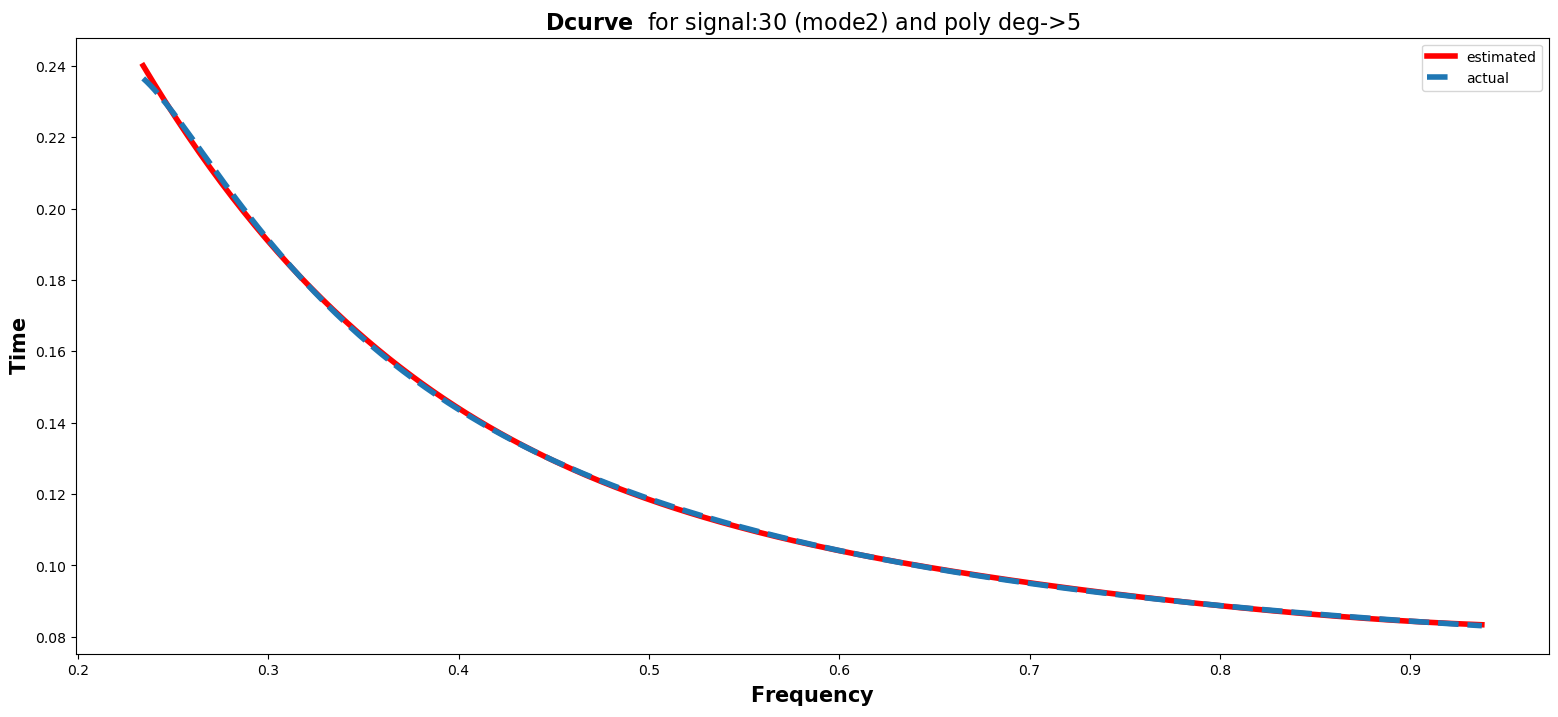

R2 = 0.99989


In [100]:
get_coeff_pol(30,2,deg=5,plot=True,dcurves=Dcurves)
plt.show()

In [101]:
(get_coeff_pol(30,2,deg=5,plot=False, dcurves=Dcurves))


R2 = 0.99989


array([ 0.63824494, -2.77950928,  5.96313957, -6.5751028 ,  3.59872532,
       -0.76266273])

In [104]:
(get_coeff_pol(2000,0,deg=5,plot=False,dcurves=Dcurves))


R2 = 0.99980


array([ 0.11827589, -0.01044518,  0.03007919, -0.04357045,  0.03156113,
       -0.00910994])

In [105]:
#plt.imshow(spectrogram(signals[4000], fs=256, nperseg=64, noverlap=32)[2],
#           cmap=plt.cm.gray_r)

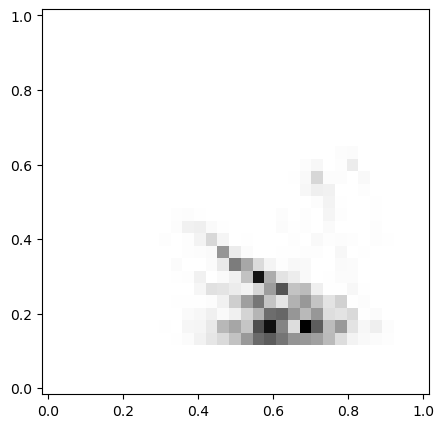

In [106]:
plt.rcParams["figure.figsize"] = (5,5)

spec0 = spectrogram(signals[0], fs=256, nperseg=64, noverlap=32)[2]
plt.pcolor(np.linspace(0,1,spec0.shape[0]),np.linspace(0,1,spec0.shape[1]),
           np.transpose(np.log(spec0+1)),cmap="gray_r")
#plt.savefig("sig0_spect.svg")

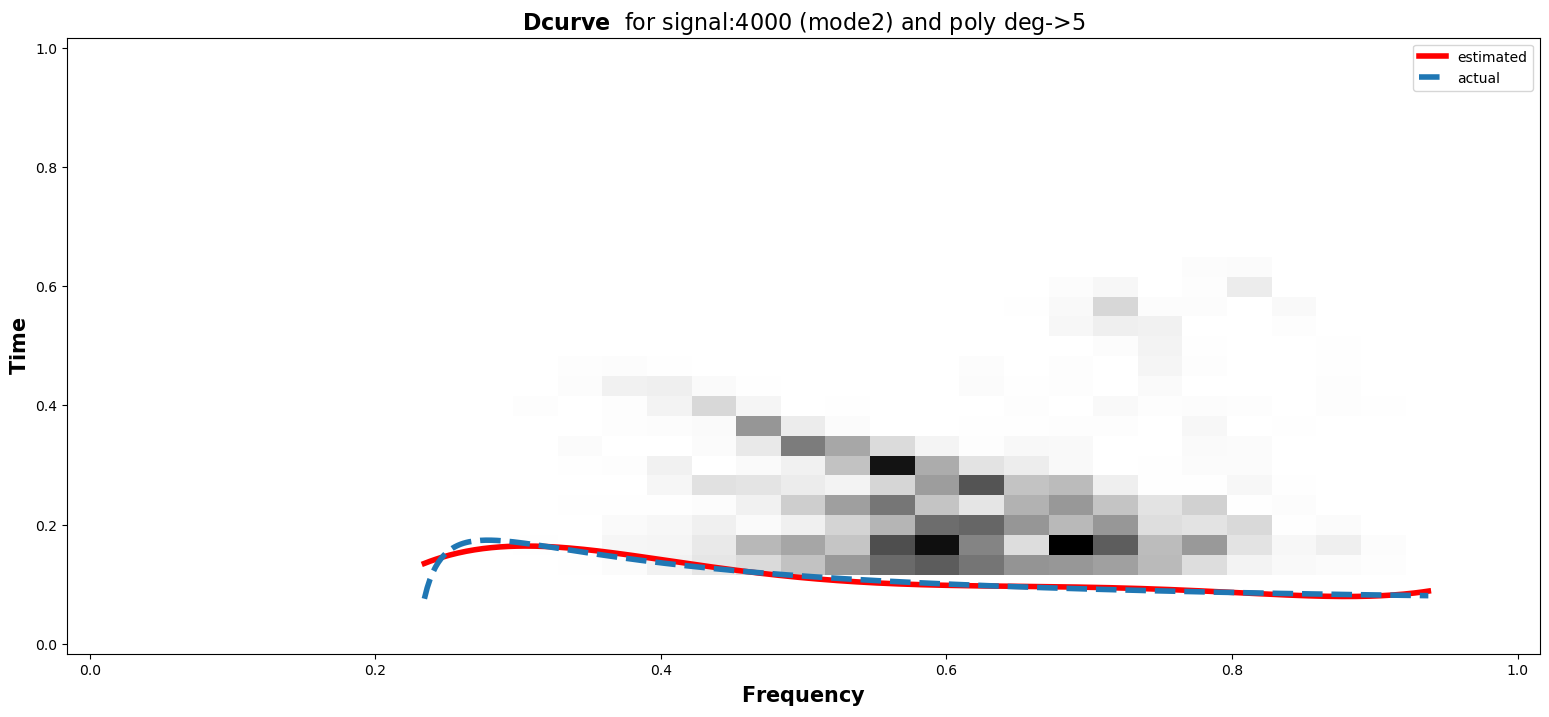

R2 = 0.95238


array([ -1.1960716 ,  13.58071937, -50.72606954,  88.58578129,
       -73.90012457,  23.79139216])

In [420]:
(plt.pcolor(np.linspace(0,1,spec0.shape[0]),np.linspace(0,1,spec0.shape[1]),
            np.transpose(np.log(spec0+1)),cmap="gray_r"))
(get_coeff_pol(4000,mode=2,deg=5,plot=True,dcurves=Dcurves))

In [108]:
#Dcurves[i][0][j] # i: signal 0, 4098,  j: modes 0,1,2
#filted_Dcurves   # same

In [109]:
# div spec_i / max spec_i

In [110]:
#output: coeff.

In [111]:
#CNN / Tensorflow / 2 layers

In [112]:
#10 val 10 test 80 train.

In [113]:
spec_list = [spectrogram(signals[i], fs=256, nperseg=64, noverlap=32)[2] for i in range(len(signals))]

In [114]:
def plot_spec(sig,mode,dcur=None):
    
    if dcur==True:
        plt.pcolor(np.linspace(0,1,spec_list[sig].shape[0]),np.linspace(0,1,spec_list[sig].shape[1]),
                np.transpose(np.log(spec_list[sig]+1)),cmap="gray_r")
        get_coeff_pol(sig,mode,deg=5,plot=True,dcurves=Dcurves)
        plt.show()
        
    else:
        plt.pcolor(np.linspace(0,1,spec_list[sig].shape[0]),np.linspace(0,1,spec_list[sig].shape[1]),
                np.transpose(np.log(spec_list[sig]+1)),cmap="gray_r")
        plt.show()
    
    

-----

# $\cdot$ OUTPUT OF $\color{red}{\textbf{CNN}}$:

------

## $$\textbf{output}^{(i)}\to
\begin{bmatrix}
m_{0,0}^{(i)}\\
m_{1,0}^{(i)}\\
\vdots\\
m_{5,0}^{(i)}\\
m_{0,1}^{(i)}\\
\vdots\\
m_{5,2}^{(i)}\\
\end{bmatrix}, \quad i:\text{ signal, }(k,j)\to (\text{coef of }x^k, \text{ mode $j\in\{0,1,2\}$)}.$$

## $$\textbf{size$^{(i)}$}\to (deg+1)\cdot3=18$$

In [115]:
#output #Filter
all_coeff_reg = []; poly_degree = 5;

for signal_i in range(len(Dcurves)):
    coef_f = lambda mode: list(get_coeff_pol(signal_i, mode, poly_degree,
                                             plot=False, Rsquare=False, dcurves=filted_Dcurves))
    
    all_coeff_reg.append(np.array(coef_f(0)+coef_f(1)+coef_f(2)))
        
len(all_coeff_reg)

4096

In [116]:
coef_f = lambda mode: list(get_coeff_pol(2, mode, poly_degree,
                                             plot=False, Rsquare=False, dcurves=filted_Dcurves))
coef_f(2)

[0.2703730372128478,
 -0.7372859057542921,
 1.8555902488780245,
 -2.535245585882614,
 1.788633448637277,
 -0.5093877515717372]

In [117]:
all_coeff_reg[0]

array([ 0.17258627, -0.0277554 ,  0.07538643, -0.10557954,  0.07520238,
       -0.02156333,  0.37396787, -1.33393586,  3.75221742, -5.4873459 ,
        4.05503839, -1.1950916 ,  0.40675872, -1.11100557,  2.5854429 ,
       -3.31423594,  2.22231476, -0.60823745])

In [118]:
all_coeff_reg[4]

array([ 0.06586313, -0.02233244,  0.06201408, -0.08797987,  0.0631492 ,
       -0.01819302,  0.25150535, -1.24753491,  3.53281781, -5.18860895,
        3.84617043, -1.13618292,  0.2698661 , -0.96031173,  2.21698668,
       -2.82554987,  1.88596724, -0.51415068])

In [119]:
all_coeff_reg[0]

array([ 0.17258627, -0.0277554 ,  0.07538643, -0.10557954,  0.07520238,
       -0.02156333,  0.37396787, -1.33393586,  3.75221742, -5.4873459 ,
        4.05503839, -1.1950916 ,  0.40675872, -1.11100557,  2.5854429 ,
       -3.31423594,  2.22231476, -0.60823745])

-----

# $\cdot$ INPUT OF $\color{red}{\textbf{CNN}}$: spectograms images

------




In [120]:
spec_list = [spectrogram(signals[i], fs=256, nperseg=64, noverlap=32)[2] for i in range(len(signals))]

In [121]:
len(spec_list) == len(signals)

True

In [122]:
len(spec_list[213])*31

1023

In [123]:
len(signals[213])

1024

In [124]:
len(spec_list[0])

33

In [125]:
spec_list[0].shape

(33, 31)

In [126]:
spec_list[0]

array([[1.01032075e-11, 1.36933861e-10, 2.34540071e-10, ...,
        1.75482338e-10, 8.22212173e-11, 4.60770563e-11],
       [1.35965762e-11, 2.35573508e-11, 1.91629182e-11, ...,
        7.08387059e-12, 4.13612965e-12, 1.07404480e-12],
       [2.18381153e-11, 3.50178687e-11, 5.35074734e-11, ...,
        1.09774646e-11, 1.36385106e-11, 2.70731482e-12],
       ...,
       [2.24408338e-08, 2.44539894e-08, 3.97071825e-08, ...,
        1.76790808e-08, 1.43551819e-08, 1.77989756e-08],
       [1.55507565e-09, 1.07994246e-09, 1.35097971e-09, ...,
        6.04456513e-10, 5.44492932e-10, 1.34980792e-09],
       [8.05099400e-10, 5.62802555e-10, 6.72950883e-10, ...,
        2.73001349e-10, 2.99452393e-10, 6.75730132e-10]])

------

# $$\bullet \underbrace{\text{Training}}_{80\%}-\underbrace{\text{Testing}}_{10\%}-\underbrace{\text{Batches}}_{10\%}$$

------

In [242]:
X = np.array(spec_list)
Y = np.array(all_coeff_reg)
print(list(Y[0].round(3))) #check the mode
#Y = Y[:,12:]

[0.173, -0.028, 0.075, -0.106, 0.075, -0.022, 0.374, -1.334, 3.752, -5.487, 4.055, -1.195, 0.407, -1.111, 2.585, -3.314, 2.222, -0.608]


In [243]:
Y[0] #check the mode

array([ 0.17258627, -0.0277554 ,  0.07538643, -0.10557954,  0.07520238,
       -0.02156333,  0.37396787, -1.33393586,  3.75221742, -5.4873459 ,
        4.05503839, -1.1950916 ,  0.40675872, -1.11100557,  2.5854429 ,
       -3.31423594,  2.22231476, -0.60823745])

In [244]:
#mu = np.array([Y[:,i].mean() for i in range(0,6)])
#sigma = np.array([Y[:,i].std() for i in range(0,6)])
#Y = (1/3)*(Y-mu)/(sigma)

In [245]:
#Y = (Y-min_Yi)/(max_Yi - min_Yi)

In [246]:
print(f'mean value = {format(Y[:,-1].mean(),".3f")}') #check the mu
print(f'std = {format(Y[:,-1].std(),".3f")}') #check the sigma

mean value = -0.402
std = 0.254


In [247]:
get_batches = lambda n: [randint(0,4096-1) for i in range(n)]

In [248]:
data = lambda n: (X[get_batches(n)], Y[get_batches(n)])
data(40)[0].shape

(40, 33, 31)

In [249]:
data(40)[1].shape

(40, 18)

In [135]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.23, random_state=42)


print(y_train[0])
     ####  SCALER   ####
scalery = MinMaxScaler().fit(y_train)
l2 = np.array([np.linalg.norm(y_train[i],2) for i in range(len(y_train))])
#y_train = scalery.transform(y_train)
#y_test = scalery.transform(y_test)
     ####  SCALER   ####
    
from keras.utils import normalize

x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)
y_train = normalize(y_train, axis=1)
y_test = normalize(y_test, axis=1)
print(y_train[0])

[ 0.41821407 -0.83971107  1.98805004 -2.58771984  1.75841312 -0.48680859]
[ 0.10849845 -0.21784859  0.51576539 -0.6713394   0.45619004 -0.12629411]


In [136]:
np.array([y_train[i]*l2[i] for i in range(len(y_train))])

array([[ 0.41821407, -0.83971107,  1.98805004, -2.58771984,  1.75841312,
        -0.48680859],
       [ 0.36743624, -1.15579324,  2.84145543, -3.80684715,  2.64523099,
        -0.745376  ],
       [ 0.44763321, -1.1714602 ,  2.53793725, -3.05155693,  1.93520878,
        -0.50479428],
       ...,
       [ 0.5797835 , -1.25986729,  3.06595771, -4.0771401 ,  2.81667288,
        -0.79002094],
       [ 0.31836383, -0.64876702,  1.54860957, -2.03316119,  1.39214257,
        -0.38783516],
       [ 0.45313823, -0.78723134,  1.79474347, -2.27136854,  1.51049005,
        -0.41103311]])

In [137]:
y_test[1] 

array([ 0.09635534, -0.2416131 ,  0.53962781, -0.66530388,  0.43065031,
       -0.1142438 ])

In [138]:
print(f'mean value = {format(y_train[:,-1].mean(),".3f")}') #check the mu
print(f'std = {format(y_train[:,-1].std(),".3f")}') #check the sigma

mean value = -0.096
std = 0.083


In [139]:
x_train.shape

(3153, 33, 31)

In [140]:
y_test.shape

(943, 6)

In [141]:
#x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, 
#                                                    test_size=0.50, random_state=42) #test-validation

----

# $$\bullet\color{orange}{\text{ Convolutional Neural Network}}$$

----

The batch size is a number of samples processed before the model is updated. The number of epochs is the number of complete passes through the training dataset. The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset

------

In [142]:
print(tf.__version__) #TensorFlow Version

2.10.0


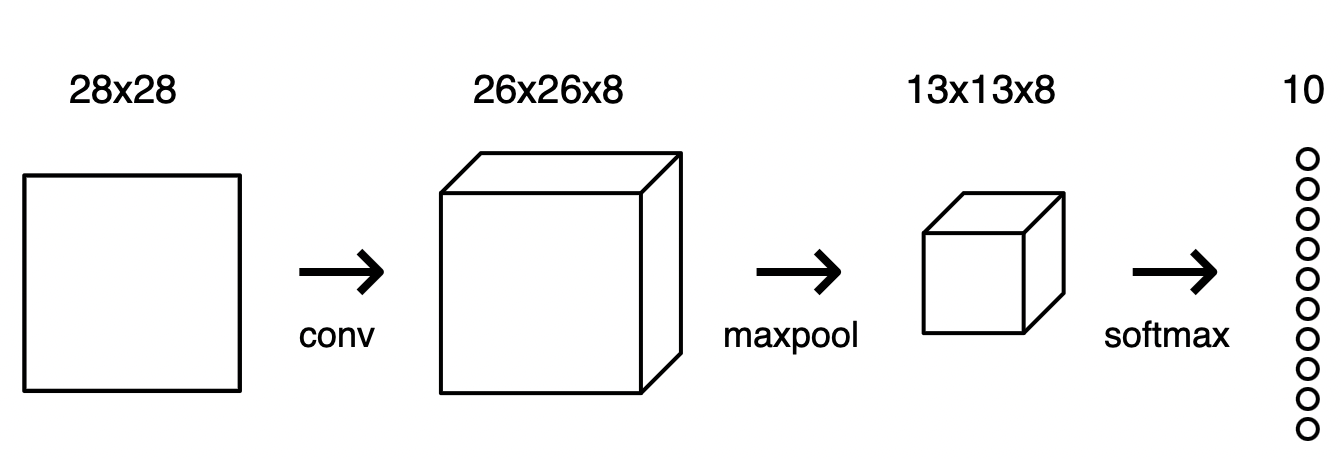

# $$\textbf{Max pooling layer}$$

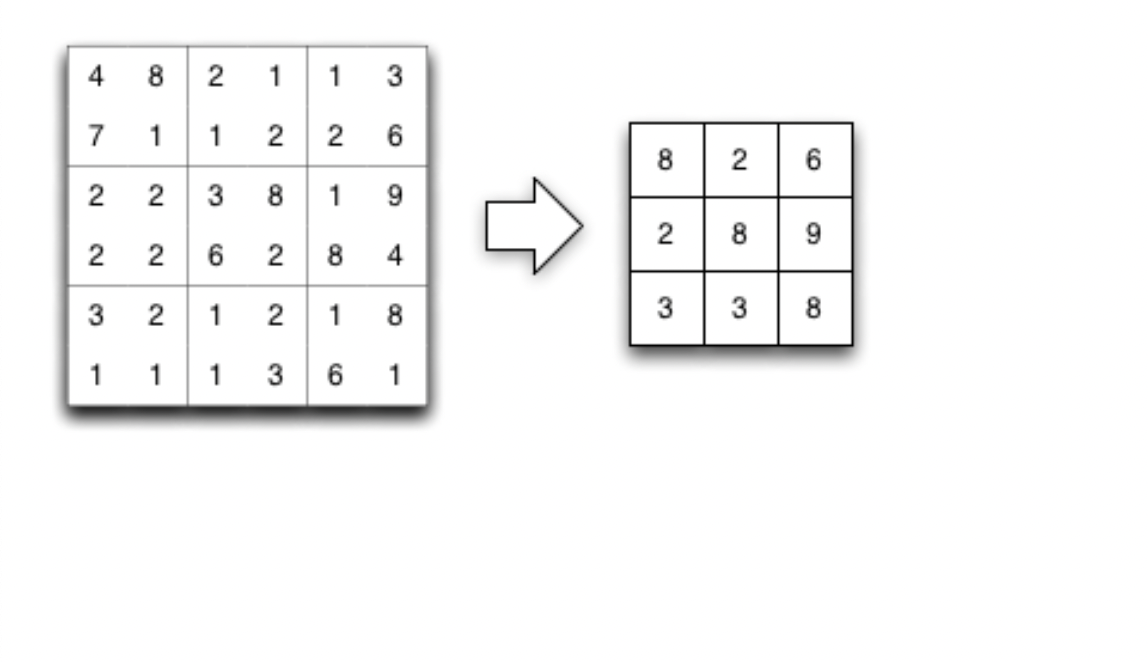

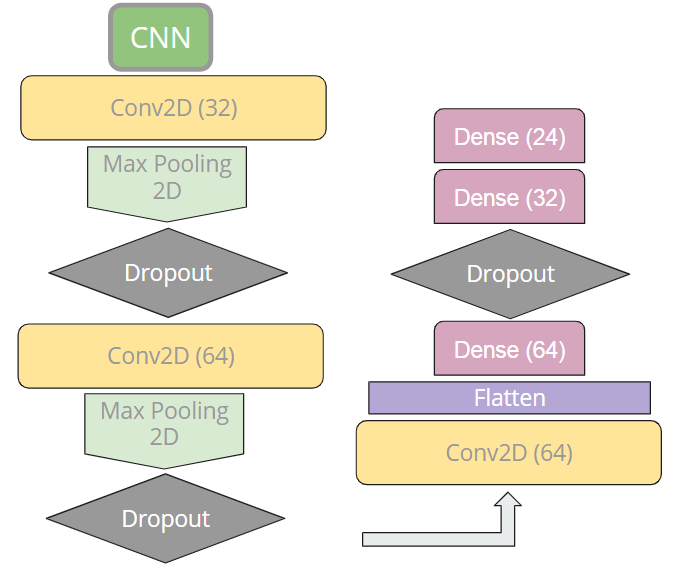

In [143]:
Y.shape

(4096, 6)

In [159]:
p = lambda x,sig,domain: np.dot(np.array([x**i for i in range(0,6)]), domain[sig])

In [160]:
pred.shape

(943, 6)

In [169]:
pred_inverse[22]

array([  0.15204467,  -2.2771833 ,   0.42426848, -10.49935   ,
        -1.7566358 ,  -1.1644112 ], dtype=float32)

In [170]:
y_test_inverse[22]

array([  0.16087922,  -2.32626718,   1.04542822, -12.511219  ,
        -0.29998948,  -1.35272037])

In [171]:
#CNNmodel.save("spectograms_to_curves.CNNmodel")

#new_model = tf.keras.models.load_model("spectograms_to_curves.CNNmodel")

In [172]:
#predictions = new_model.predict([X])

In [173]:
#predictions[15]

# Adam optimizer (adaptive moment estimation)

The optimizer is called Adam because uses estimations of the first and second moments of the gradient to adapt the learning rate for each weight of the neural network.

In [252]:
mul = 10
mul_arr = np.array([mul]+[1]*17)*Y[4]
orig_arr = np.array([1/mul]+[1]*17)*mul_arr
orig_arr == Y[4] #0.17258627

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [253]:
#mul_Y[222]*np.array([1/100]+[1]*17)-Y[222]
mul = 10
mul_Y = [np.array([mul]+[1]*17)*Y[i] for i in range(len(Y))]
oper = np.array([mul]+[1]*5+[mul]+[1]*5+[mul]+[1]*5)
inv_oper = np.array([1/mul]+[1]*5+[1/mul]+[1]*5+[1/mul]+[1]*5)
oper

array([10,  1,  1,  1,  1,  1, 10,  1,  1,  1,  1,  1, 10,  1,  1,  1,  1,
        1])

In [254]:
inv_oper

array([0.1, 1. , 1. , 1. , 1. , 1. , 0.1, 1. , 1. , 1. , 1. , 1. , 0.1,
       1. , 1. , 1. , 1. , 1. ])

In [255]:
mul_Y = np.array([oper*Y[i] for i in range(len(Y))])
inv_Y = np.array([inv_oper*mul_Y[i] for i in range(len(mul_Y))])
mul_Y[0]

array([ 1.7258627 , -0.0277554 ,  0.07538643, -0.10557954,  0.07520238,
       -0.02156333,  3.73967866, -1.33393586,  3.75221742, -5.4873459 ,
        4.05503839, -1.1950916 ,  4.06758719, -1.11100557,  2.5854429 ,
       -3.31423594,  2.22231476, -0.60823745])

In [256]:
inv_Y[100] - Y[100]

array([1.38777878e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

## $$m_0 \to 10\cdot m_0$$

In [257]:


class CNN_model_mode:
    
    def __init__(self,mode):
        self.mode = mode

        
    def fit_model(self,metrics_error=None, epochs_=None, domain=None, norml=None):
        
        #set defaults
    
        if metrics_error==None or type(metrics_error)!=str:
            metrics_error = 'accuracy'
        if epochs_==None:
            epochs_ = 6
            


        X = np.array(spec_list)
        Y = np.array(all_coeff_reg)
        Y_copy = Y
        mul = 10
        self.mul = mul
        oper = np.array([mul]+[1]*5+[mul]+[1]*5+[mul]+[1]*5)
        Y = np.array([oper*Y[i] for i in range(len(Y))]) #m0*10 Y.
        
        x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                        test_size=0.23, random_state=42)
        
        self.ytest = y_test
        
        if self.mode==0: i,j, opt = 0,6, 'adam'
        if self.mode==1: i,j, opt = 6,12, 'adam'
        if self.mode==2: i,j, opt = 12,18, 'adam'



        
        ######   norml scaler  ######
        
        self.y__test = y_test
        
        if norml in [True,1,'true']:
            
            #scalery = MinMaxScaler().fit(y_test)
            
            l2_y_train = np.array([np.linalg.norm(y_train[i],2) for i in range(len(y_train))])
            l2_y_test = np.array([np.linalg.norm(y_test[i],2) for i in range(len(y_test))])
            x_train = normalize(x_train, axis=1)
            x_test = normalize(x_test, axis=1)
            y_train = normalize(y_train, axis=1)
            y_test = normalize(y_test, axis=1)

        ######   norml scaler  ######  
        
        
        if domain==None: domain = x_test
            


                       #########  C N N  #########


        """input_shape=(33,31,1)  # size of the "image" (spectogram) , "colors" -> 1 

        CNNmodel = models.Sequential()

        CNNmodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
        CNNmodel.add(MaxPooling2D((2, 2))) # Block Matrices shape -> 2x2

        CNNmodel.add(Dropout(0.2))  #Preventing overfitting / drops a neuron with probability 0.2 

        CNNmodel.add(Conv2D(64, (3, 3), activation='relu'))
        CNNmodel.add(MaxPooling2D((2, 2)))

        CNNmodel.add(Dropout(0.2))
        
        CNNmodel.add(Dense(6, activation='relu')) #fully connected layer , units->6, bias->True
        
        CNNmodel.add(Conv2D(64, (3, 3), activation='relu'))
        CNNmodel.add(Flatten())
        CNNmodel.add(Dense(6, activation='tanh')) #fully connected layer , units->6, bias->True"""
        
        
                                ### new CNN model  ###
        
        input_shape=(33,31,1)  # size of the "image" (spectogram) , "colors" -> 1 

        CNNmodel = models.Sequential()


        CNNmodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
        CNNmodel.add(MaxPooling2D((2, 2))) # Block Matrices shape -> 2x2

        CNNmodel.add(Dropout(0.2))  #Preventing overfitting / drops a neuron with probability 0.2 


        CNNmodel.add(Conv2D(64, (3, 3), activation='relu'))
        CNNmodel.add(MaxPooling2D((2, 2)))

        CNNmodel.add(Dropout(0.2))




        CNNmodel.add(Conv2D(64, (3, 3), activation='relu'))
        CNNmodel.add(Flatten())
        CNNmodel.add(Dense(32, activation='relu'))
        CNNmodel.add(Dropout(0.2))



        CNNmodel.add(Dense(18, activation='tanh')) #output layer , units->6, bias->True

        CNNmodel.compile(optimizer=opt,  # stochastic gradient descent (SGD) also works fine
                  loss=tf.keras.losses.mean_squared_error,
                  metrics=[metrics_error])
        
                                ### new CNN model  ###

        ### Fit/Train ###

        history = CNNmodel.fit(x_train, y_train, epochs=epochs_, 
                        validation_data=(x_test, y_test))
        
        self.pred = CNNmodel.predict([domain])
        self.cnn_model = CNNmodel
        
        if norml in [True,1,'true']:
            #self.pred_original_scale = scalery.inverse_transform(self.pred)
            #self.y_test_original = scalery.inverse_transform(y_test)
            self.pred_original_scale = np.array([self.pred[i]*l2_y_test[i] for i in range(len(self.pred))])
            self.y_test_original = np.array([y_test[i]*l2_y_test[i] for i in range(len(y_test))])
        else:
            self.pred_original_scale = self.pred
            self.y_test_original = y_test
            
        self.x_test = x_test
        self.y_test = y_test
        self.history = history
        self.metrics_error = metrics_error
        

            
            
    def plot_lost_function(self):
        plt.title("$\mathbf{Lost}$ $\mathbf{function}$ for " + f'{self.metrics_error} metrics', size = 17)
        plt.plot(self.history.history[self.metrics_error])
        plt.show()
    
    def predict(self):
        n = len(self.pred_original_scale)
        inv_oper = np.array([1/self.mul]+[1]*5+[1/self.mul]+[1]*5+[1/self.mul]+[1]*5)
        pred_org = np.array([inv_oper*self.pred_original_scale[i] for i in range(n)])
        #pred_org = np.array([self.pred_original_scale[i]*np.array([1/100]+[1]*17) for i in range(n)])
        return pred_org
        #return self.pred_original_scale
    def y_test_(self):
        n = len(self.y_test_original)
        inv_oper = np.array([1/self.mul]+[1]*5+[1/self.mul]+[1]*5+[1/self.mul]+[1]*5)
        y_org = np.array([inv_oper*self.y_test_original[i] for i in range(n)])
        #y_org = np.array([self.y_test_original[i]*np.array([1/100]+[1]*17) for i in range(n)])
        return y_org
        #return self.y_test_original
        
    def any_prediction(self,x_i): #x_i is a subset of X (it might be a single point or a seq of points in X)
        prediction_i = self.cnn_model.predict([x_i])
        
        return prediction_i
        
    
    def check_curves(self,mode,domain_x=None,domain_y=None,plots=None,xlimm=None,ylimm=None):
        if domain_x==None: domain_x = self.x_test
        if domain_y==None: domain_y = self.y_test_()
        if plots==None: plots = 1
        
        #p = lambda x,sig,domain: np.dot(np.array([10]+[x**i for i in range(1,6)]), domain[sig])
        p = lambda x,sig,domain: np.dot(np.array([x**i for i in range(6)]), domain[sig])
        
        """if self.mode==0:
            y1,y2 = -0.5, 1.01
        elif self.mode==1:
            y1,y2 = -0.5, 1.02
        elif self.mode==2:
            y1,y2 = -0.5, 1.02"""
        if xlimm==None: xlimm = (0.15,10)
        if ylimm==None: ylimm = (-0.5, 1.01)
            
        for sig in [randint(0,domain_x.shape[0]) for i in range(plots)]: 
            plt.ylim(ylimm[0],ylimm[1])
            plt.xlim(xlimm[0],xlimm[1])
            #X_space = np.linspace(0.234375,0.9375,349)
            X_space = np.linspace(-80,80,2000)
            
            
            if mode == 0:
                #plot mod0
                domm = self.predict()[:,0:6]
                dom_y = domain_y[:,0:6]

                plt.plot(X_space, [p(x,sig,domain=domm) for x in X_space], color='red',lw=3)
                plt.plot(X_space, [p(x,sig,domain=dom_y) for x in X_space], color='blue',lw=3)
                plt.title("$\mathbf{Plot}$ "+f" for signal: {sig} (mode {mode}) regr. deg->5", size=16)
                plt.ylabel("$\mathbf{Time}$", size = 15)
                plt.xlabel("$\mathbf{Frequency}$", size = 15)
            
            
            
            elif mode == 1:
                #plot mode1
                domm = self.predict()[:,6:12]
                dom_y = domain_y[:,6:12]

                plt.plot(X_space, [p(x,sig,domain=domm) for x in X_space], color='red',lw=3)
                plt.plot(X_space, [p(x,sig,domain=dom_y) for x in X_space], color='blue',lw=3)
                plt.title("$\mathbf{Plot}$ "+f" for signal: {sig} (mode {mode}) regr. deg->5", size=16)
                plt.ylabel("$\mathbf{Time}$", size = 15)
                plt.xlabel("$\mathbf{Frequency}$", size = 15)
            
            
            elif mode==2:
                #plot mode2
                domm = self.predict()[:,12:]
                dom_y = domain_y[:,12:]

                plt.plot(X_space, [p(x,sig,domain=domm)  for x in X_space], color='red',lw=3)
                plt.plot(X_space, [p(x,sig,domain=dom_y) for x in X_space], color='blue',lw=3)
                plt.title("$\mathbf{Plot}$ "+f" for signal: {sig} (mode {mode}) regr. deg->5", size=16)
                plt.ylabel("$\mathbf{Time}$", size = 15)
                plt.xlabel("$\mathbf{Frequency}$", size = 15)
                plt.show()

    def y_testing(self):
        return self.y_test_()

In [181]:
dom = [666,2,3,4,5,6]
px = np.dot(np.array([10]+[x**i for i in range(1,6)]), dom)
pxx = np.dot(np.array([x**i for i in range(6)]), dom)

px

6*x**5 + 5*x**4 + 4*x**3 + 3*x**2 + 2*x + 6660

In [182]:
real_px = px-9*dom[0]
real_px

6*x**5 + 5*x**4 + 4*x**3 + 3*x**2 + 2*x + 666

In [183]:
modes = CNN_model_mode(0)
modes.fit_model(metrics_error='mse',epochs_=700,norml=True)

Epoch 1/700


2022-10-17 15:21:47.318364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 1s 10ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2/700
 1/99 [..............................] - ETA: 1s - loss: 0.0066 - mse: 0.0066

2022-10-17 15:21:48.342204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 1s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3/700
99/99 [==============================] - 1s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4/700
99/99 [==============================] - 1s 8ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 5/700
99/99 [==============================] - 1s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 6/700
99/99 [==============================] - 1s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 7/700
99/99 [==============================] - 1s 7ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 8/700
99/99 [==============================] - 1s 9ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 9/700
99/99 [==============================] - 1s 7ms/step - loss: 0.0016 - mse: 0.0016 -

2022-10-17 15:30:05.334675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


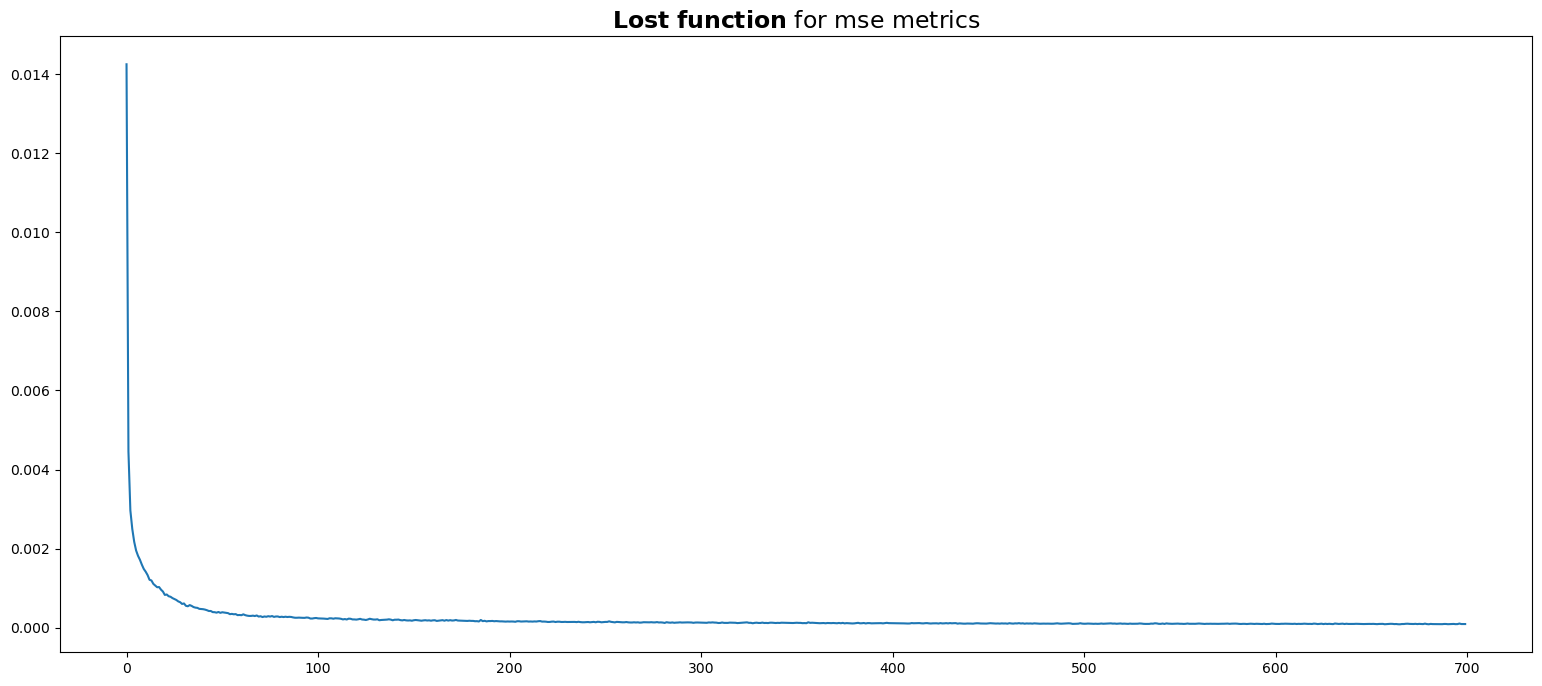

In [236]:
modes.plot_lost_function()

In [185]:
n=randint(0,800)
print(100*'_')
print(f'signal - > {n} (of testing dataset):\n')
y_pred_i = modes.predict()[n].round(4)
y_test_i = modes.y_test_()[n].round(4)

l2n = np.linalg.norm(y_pred_i - y_test_i, 2)
linfn = np.linalg.norm(y_pred_i - y_test_i, np.inf)

print(f'All Modes:\n-> real data:    {y_test_i}\n\n-> predicted data : {y_pred_i}\n\nl2: {l2n}, l-oo norm: {linfn}')

print(100*'_')
print(f'\n\n-> MODE 0: \n         real data: {y_test_i[:6]}\n\n-> predicted data : {y_pred_i[:6]}')
print(f'\n\n\n-> MODE 1: \n          real data: {y_test_i[6:12]}\n\n -> predicted data : {y_pred_i[6:12]}')
print(f'\n\n\n-> MODE 2: \n          real data: {y_test_i[12:]}\n\n -> predicted data : {y_pred_i[12:]}')
print(100*'_')

____________________________________________________________________________________________________
signal - > 226 (of testing dataset):

All Modes:
-> real data:    [ 0.3225 -0.0502  0.1332 -0.1851  0.1317 -0.0378  0.6413 -2.0464  5.6647
 -8.1837  5.9882 -1.7509  0.6703 -1.4907  3.0995 -3.5493  2.1351 -0.5274]

-> predicted data : [ 0.4488 -0.0366  0.0954 -0.1295  0.0996 -0.0268  0.6917 -1.6343  4.5961
 -6.7253  4.986  -1.488   0.7421 -1.4852  3.5259 -4.6659  3.2169 -0.8878]

l2: 2.6963883270033637, l-oo norm: 1.4584000000000001
____________________________________________________________________________________________________


-> MODE 0: 
         real data: [ 0.3225 -0.0502  0.1332 -0.1851  0.1317 -0.0378]

-> predicted data : [ 0.4488 -0.0366  0.0954 -0.1295  0.0996 -0.0268]



-> MODE 1: 
          real data: [ 0.6413 -2.0464  5.6647 -8.1837  5.9882 -1.7509]

 -> predicted data : [ 0.6917 -1.6343  4.5961 -6.7253  4.986  -1.488 ]



-> MODE 2: 
          real data: [ 0.6703 -1.4

In [258]:
np.array([0.1]+[1]*5+[0.1]+[1]*5+[0.1]+[1]*5)

array([0.1, 1. , 1. , 1. , 1. , 1. , 0.1, 1. , 1. , 1. , 1. , 1. , 0.1,
       1. , 1. , 1. , 1. , 1. ])

In [408]:
from sympy.abc import x

real_poly_mode_0 = lambda x: np.dot(y_test_i[0:6],np.array([x**i for i in range(6)]))
real_poly_mode_0(x)

-0.022*x**5 + 0.075*x**4 - 0.106*x**3 + 0.075*x**2 - 0.028*x + 0.173

In [409]:
pred_poly_mode_0 = lambda x: np.dot(y_pred_i[0:6],np.array([x**i for i in range(6)]))
pred_poly_mode_0(x)

-0.019*x**5 + 0.072*x**4 - 0.093*x**3 + 0.07*x**2 - 0.029*x + 0.168

In [410]:
real_poly_mode_1 = lambda x: np.dot(y_test_i[6:12],np.array([x**i for i in range(6)]))
real_poly_mode_1(x)

-1.195*x**5 + 4.055*x**4 - 5.487*x**3 + 3.752*x**2 - 1.334*x + 0.374

In [411]:
pred_poly_mode_1 = lambda x: np.dot(y_pred_i[6:12],np.array([x**i for i in range(6)]))
pred_poly_mode_1(x)

-1.029*x**5 + 3.455*x**4 - 4.704*x**3 + 3.239*x**2 - 1.169*x + 0.345

In [412]:
real_poly_mode_2 = lambda x: np.dot(y_test_i[12:],np.array([x**i for i in range(6)]))
real_poly_mode_2(x)

-0.608*x**5 + 2.222*x**4 - 3.314*x**3 + 2.585*x**2 - 1.111*x + 0.407

In [413]:
pred_poly_mode_2 = lambda x: np.dot(y_pred_i[12:],np.array([x**i for i in range(6)]))
pred_poly_mode_2(x)

-0.385*x**5 + 1.488*x**4 - 2.331*x**3 + 1.91*x**2 - 0.89*x + 0.365

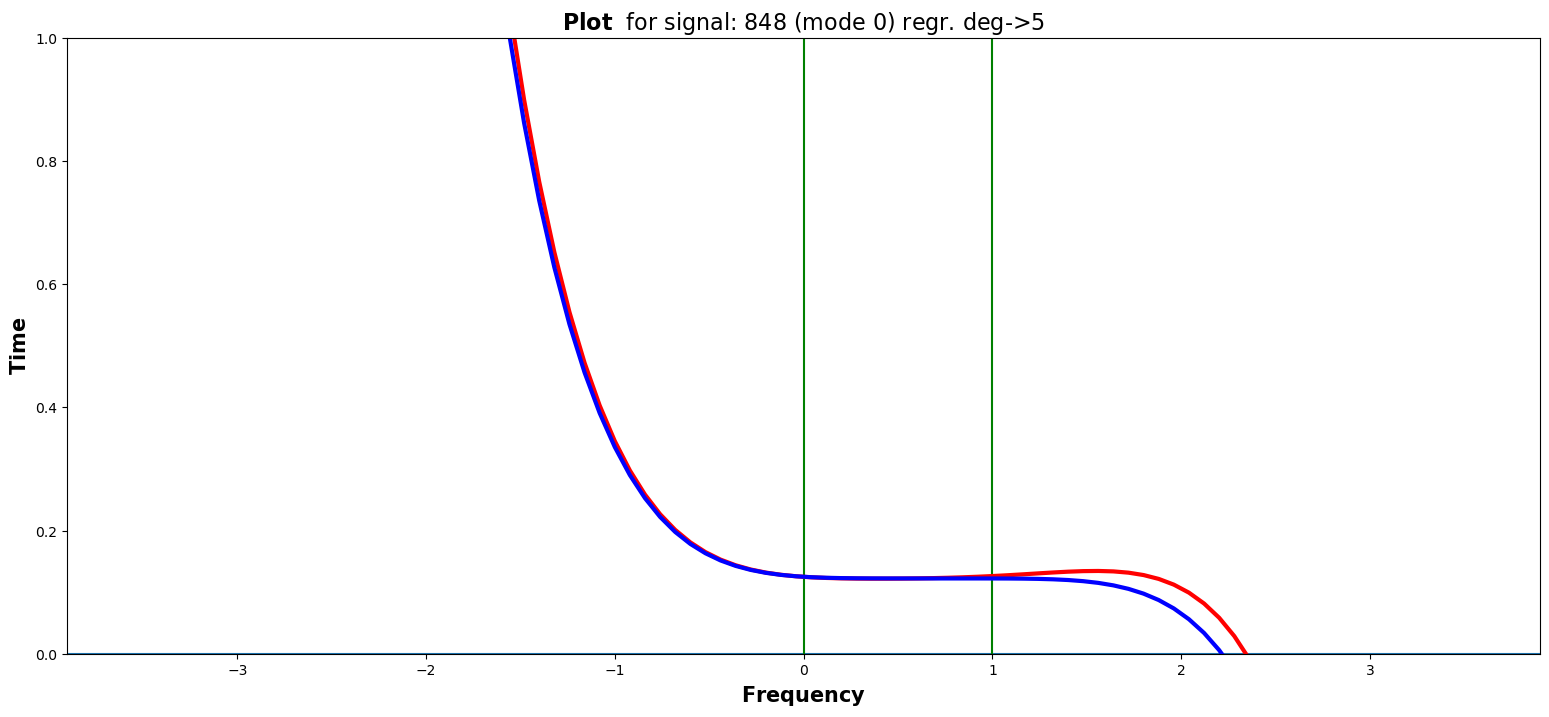

In [417]:
plt.plot(np.linspace(-20,20,600), [0]*600)
plt.plot([0]*600, np.linspace(-50,50,600), 'green')
plt.plot([1]*600, np.linspace(-50,50,600), 'green')
modes.check_curves(mode=0,xlimm=(-3.9,3.9),ylimm=(0,1))

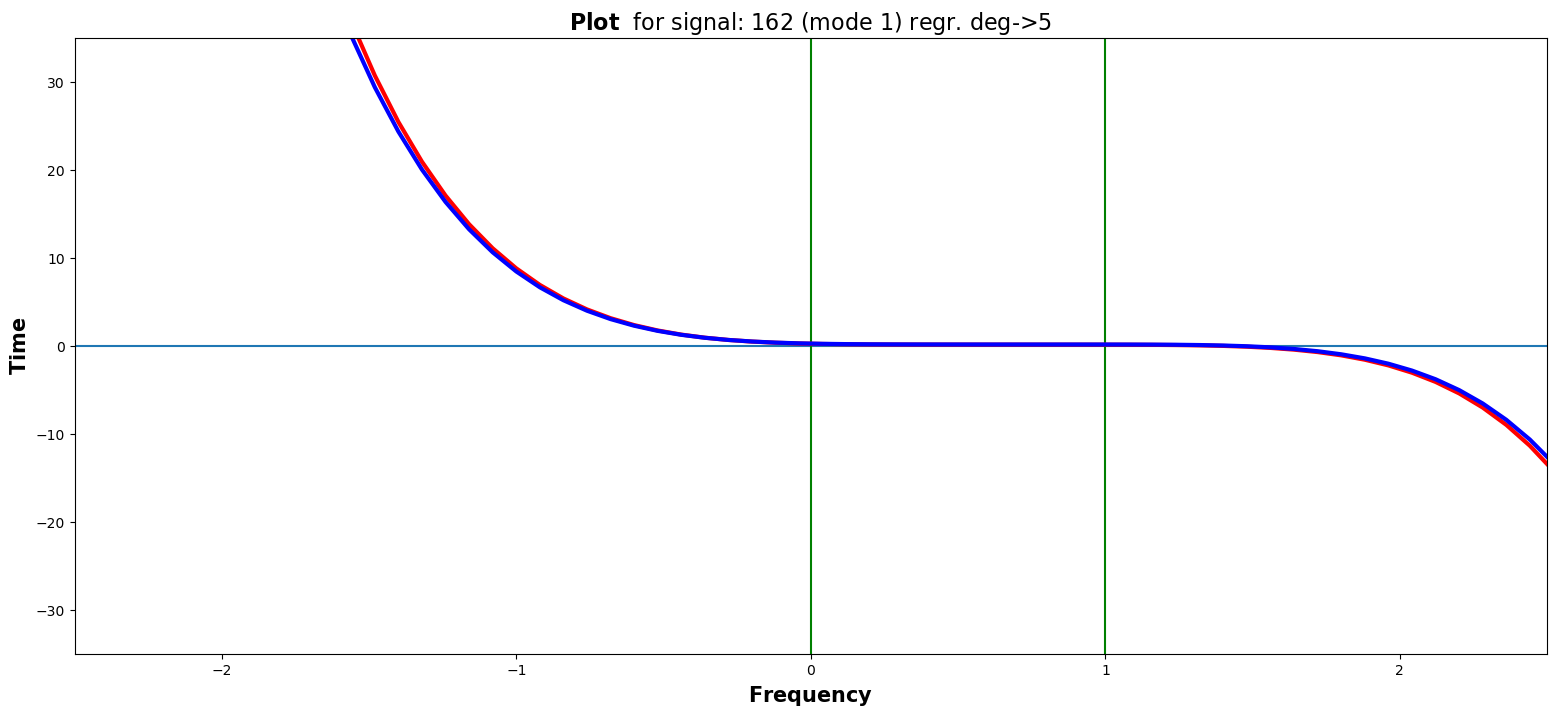

In [266]:
plt.plot(np.linspace(-20,20,600), [0]*600)
plt.plot([0]*600, np.linspace(-50,50,600), 'green')
plt.plot([1]*600, np.linspace(-50,50,600), 'green')
modes.check_curves(mode=1,xlimm=(-2.5,2.5),ylimm=(-35,35))

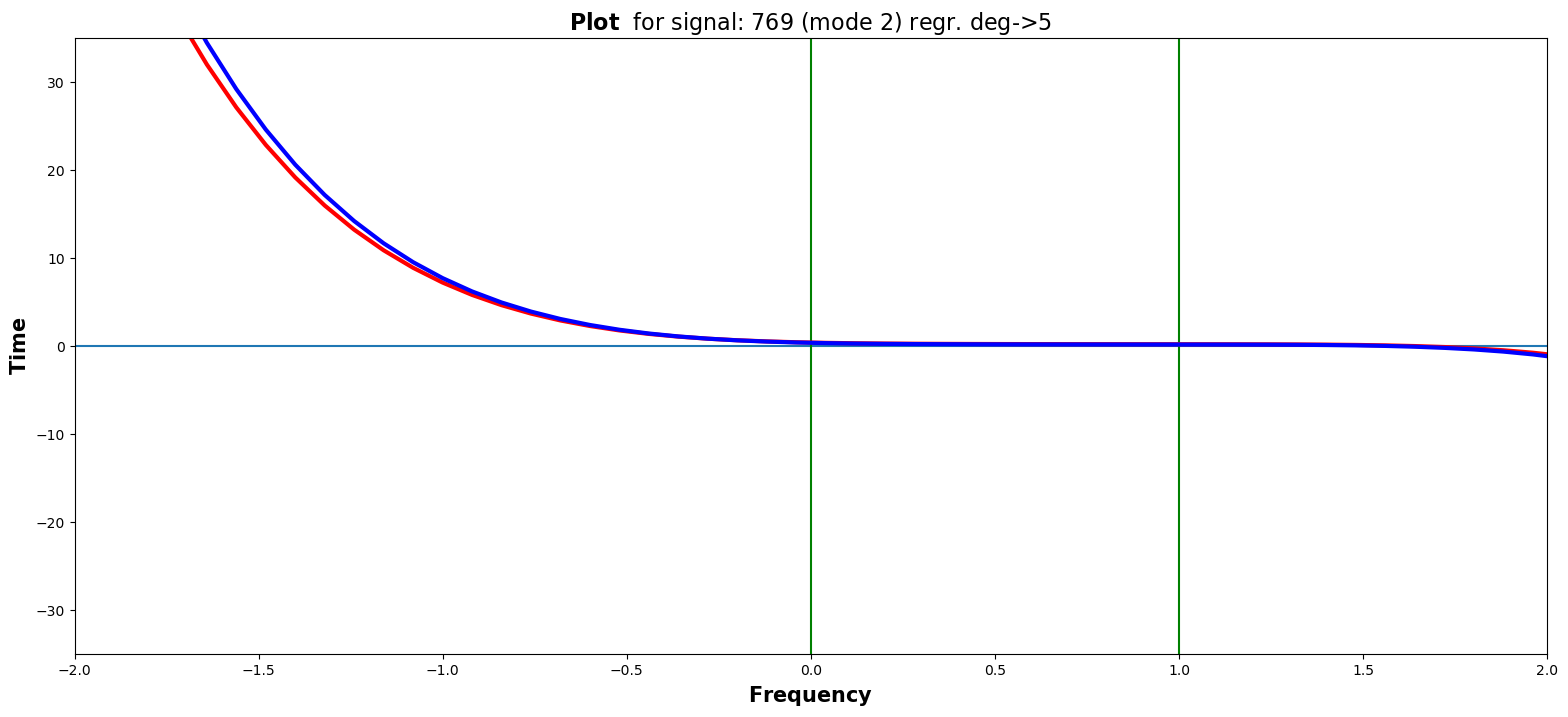

In [267]:
plt.plot(np.linspace(-20,20,600), [0]*600)
plt.plot([0]*600, np.linspace(-50,50,600), 'green')
plt.plot([1]*600, np.linspace(-50,50,600), 'green')
modes.check_curves(mode=2,xlimm=(-2,2),ylimm=(-35,35))

In [268]:
Y_pred_0 = modes.any_prediction(X[0:1])[0]

1/1 [==============================] - 0s 25ms/step


In [269]:
(Y[0] - Y_pred_0).round(2)

array([-0.01, -0.02,  0.07, -0.1 ,  0.07, -0.02,  0.01, -1.21,  3.41,
       -4.99,  3.69, -1.09,  0.02, -1.02,  2.38, -3.07,  2.06, -0.57])

In [270]:
Y_pred_0.round(3)

array([ 0.178, -0.003,  0.007, -0.01 ,  0.008, -0.002,  0.367, -0.124,
        0.344, -0.5  ,  0.367, -0.109,  0.389, -0.095,  0.203, -0.248,
        0.158, -0.041], dtype=float32)

In [271]:
Y[0].round(3)

array([ 0.173, -0.028,  0.075, -0.106,  0.075, -0.022,  0.374, -1.334,
        3.752, -5.487,  4.055, -1.195,  0.407, -1.111,  2.585, -3.314,
        2.222, -0.608])

In [272]:
#[Y[i] in y_test for i in range(len(Y))]

In [442]:
n=0
print(100*'_')
print(f'signal - > {n}:\n')
y_pred_i = (np.linalg.norm(Y[0],2)*np.array([0.1]+[1]*5+[0.1]+[1]*5+[0.1]+[1]*5)*Y_pred_0).round(3)
y_test_i = (Y[0]).round(3)

l2n = np.linalg.norm(y_pred_i - y_test_i, 2)
linfn = np.linalg.norm(y_pred_i - y_test_i, np.inf)

print(f'All Modes:\n-> real data:    {y_test_i}\n\n-> predicted data : {y_pred_i}\n\nl2: {l2n}, l-oo norm: {linfn}')

print(100*'_')
print(f'\n\n-> MODE 0: \n         real data: {y_test_i[:6]}\n\n-> predicted data : {y_pred_i[:6]}')
print(f'\n\n\n-> MODE 1: \n          real data: {y_test_i[6:12]}\n\n -> predicted data : {y_pred_i[6:12]}')
print(f'\n\n\n-> MODE 2: \n          real data: {y_test_i[12:]}\n\n -> predicted data : {y_pred_i[12:]}')
print(100*'_')

____________________________________________________________________________________________________
signal - > 0:

All Modes:
-> real data:    [ 0.173 -0.028  0.075 -0.106  0.075 -0.022  0.374 -1.334  3.752 -5.487
  4.055 -1.195  0.407 -1.111  2.585 -3.314  2.222 -0.608]

-> predicted data : [ 0.168 -0.029  0.07  -0.093  0.072 -0.019  0.345 -1.169  3.239 -4.704
  3.455 -1.029  0.365 -0.89   1.91  -2.331  1.488 -0.385]

l2: 1.8311531885672485, l-oo norm: 0.9830000000000001
____________________________________________________________________________________________________


-> MODE 0: 
         real data: [ 0.173 -0.028  0.075 -0.106  0.075 -0.022]

-> predicted data : [ 0.168 -0.029  0.07  -0.093  0.072 -0.019]



-> MODE 1: 
          real data: [ 0.374 -1.334  3.752 -5.487  4.055 -1.195]

 -> predicted data : [ 0.345 -1.169  3.239 -4.704  3.455 -1.029]



-> MODE 2: 
          real data: [ 0.407 -1.111  2.585 -3.314  2.222 -0.608]

 -> predicted data : [ 0.365 -0.89   1.91  -2.331  

In [443]:
Y_pred_on_X = modes.any_prediction(X)
Y_pred_on_X[0]

128/128 [==============================] - 1s 2ms/step


array([ 0.1782755 , -0.00306116,  0.00744111, -0.00985206,  0.00770957,
       -0.00202834,  0.3666115 , -0.12429857,  0.344471  , -0.50022703,
        0.36741894, -0.1094303 ,  0.3886385 , -0.09468241,  0.20313707,
       -0.24793586,  0.15826918, -0.04090254], dtype=float32)

In [444]:
(np.linalg.norm(Y[0],2)*np.array([0.1]+[1]*5+[0.1]+[1]*5+[0.1]+[1]*5)*Y_pred_on_X[0]).round(3)

array([ 0.168, -0.029,  0.07 , -0.093,  0.072, -0.019,  0.345, -1.169,
        3.239, -4.704,  3.455, -1.029,  0.365, -0.89 ,  1.91 , -2.331,
        1.488, -0.385])

In [445]:
def sim_measure(sig,N=None):  
    if N==None: N = 5
        
    #pred = 0.1*Y_pred_on_X[sig]
    pred = (np.linalg.norm(Y[sig])*np.array([0.1]+[1]*5+[0.1]+[1]*5+[0.1]+[1]*5)*Y_pred_on_X[sig]).round(4)
    
    real_coeff = Y[sig]
    
    p = lambda x: np.dot(np.array([x**i for i in range(18)]), pred)

    
    q = lambda x: np.dot(np.array([x**i for i in range(18)]), real_coeff)
    

    space = np.linspace(0,1,N)

    Norm = np.sqrt(sum((np.array(list(map(p,space))) - np.array(list(map(q,space))))**2))
    
    
    return Norm




def sim2_measure(sig,other,N=None):  
    if N==None: N = 10
        
    pred = (np.linalg.norm(Y[other])*np.array([0.1]+[1]*5+[0.1]+[1]*5+[0.1]+[1]*5)*Y_pred_on_X[other])
    
    real_coeff = Y[sig]
    
    p = lambda x: np.dot(np.array([x**i for i in range(18)]), pred)

    
    q = lambda x: np.dot(np.array([x**i for i in range(18)]), real_coeff)
    

    space = np.linspace(0,1,N)

    #Norm = np.sqrt(sum((np.array(list(map(p,space))) - np.array(list(map(q,space))))**2))
    Norm = np.linalg.norm(np.array(list(map(p,space))) - np.array(list(map(q,space))), 2)
    
    return Norm

In [446]:
#sim_m = [sim_measure(i) for i in range(len(Y))]
sim2_m = [sim2_measure(i,0) for i in range(len(Y))]
#sim_m

In [447]:
#sim2_m[np.argmin(sim2_m)] = 10000
np.argmin(sim2_m)

1520

In [448]:
np.argmax(sim2_m)

3801

In [449]:
min(sim2_m)

0.01866858836733059

In [450]:
max(sim2_m)

0.9582468029393133

In [451]:
time = np.linspace(12,16,1024)

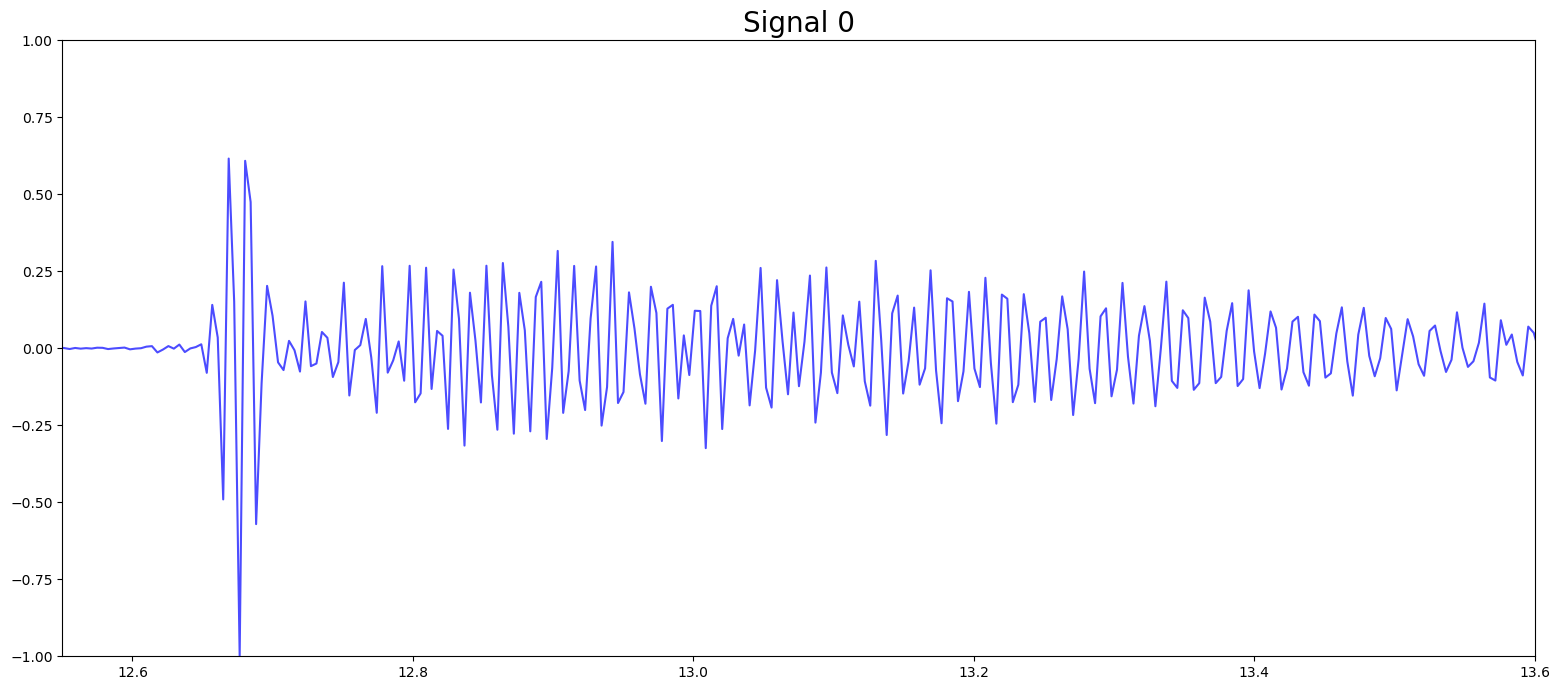

In [452]:
if __name__=="__main__":
    plt.xlim(12.55, 13.6)
    plt.ylim(-1,1)
    plt.plot(time,signals[0],"b", alpha=0.7)
    plt.title(f"Signal {0}", size = 20)
    #plt.savefig("sig0_series.svg")

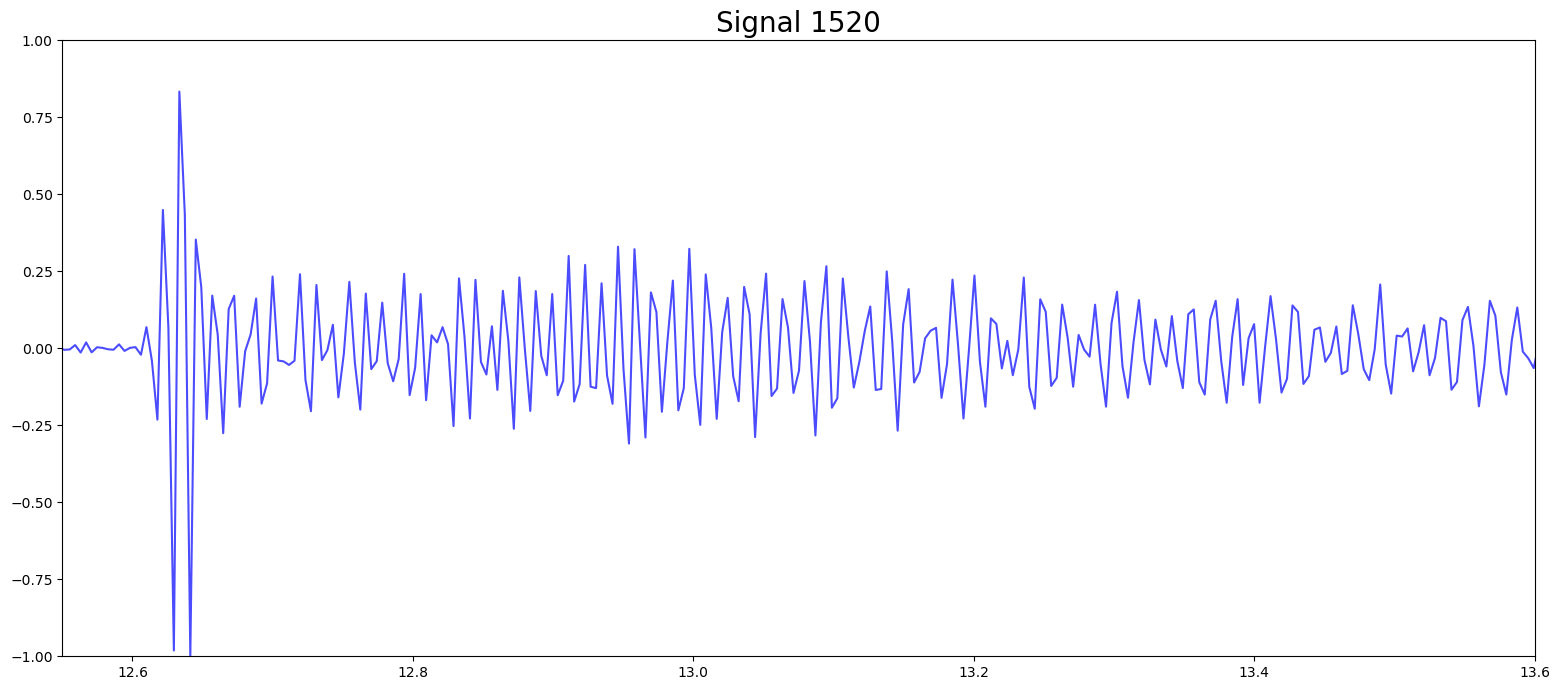

In [453]:
if __name__=="__main__":
    plt.xlim(12.55, 13.6)
    plt.ylim(-1,1)
    plt.plot(time, signals[np.argmin(sim2_m)],"b", alpha=0.7)
    plt.title(f"Signal {np.argmin(sim2_m)}", size = 20)
    #plt.savefig("sig237_series.svg")

In [285]:
Y_pred_on_X = modes.any_prediction(X)
n = len(Y)
Y_pred_on_X = [np.linalg.norm(Y[i])*np.array([0.1]+[1]*5+[0.1]+[1]*5+[0.1]+[1]*5)*Y_pred_on_X[i] for i in range(n)]

128/128 [==============================] - 0s 2ms/step


In [286]:
Y_pred_on_X[0].round(3) # now its the real prediction (real scaler)

array([ 0.168, -0.029,  0.07 , -0.093,  0.072, -0.019,  0.345, -1.169,
        3.239, -4.704,  3.455, -1.029,  0.365, -0.89 ,  1.91 , -2.331,
        1.488, -0.385])

In [287]:
y,x = zip(*Dcurves[0][0][0])
print(type(y))

<class 'tuple'>


In [288]:
def my_scaler(y, inverse=None): #y array or tuple
    y = tuple(y)
    
    t_star_max = (max(y) - 12)/2 ; t_star_min = (min(y) - 12)/2
    
    y = np.array(y)
    y = np.array(list(map(lambda i: [i], y)));
    
    y = y - min(y); y = y/2
    
    y = (y*(t_star_max - t_star_min) + t_star_min)/2
    
    return np.array(list(map(lambda x: x[0], y)))
    


In [440]:


def plot_all(signal,mode,deg,plot=None,Rsquare=None,dcurves=None):
    if dcurves==None:
        dcurves = Dcurves
        
    y,x = zip(*dcurves[signal][0][mode])

    t_star_max = (max(y) - 12)/2 ; t_star_min = (min(y) - 12)/2
    x = np.array(x) ; x = np.array(list(map(lambda i: [i], x))) - min(x); x = x/max(x)
    x = 30/128 + 90*x/128
    
    y = np.array(y) ; 
    ###print(f'max:{max(y)}, min:{min(y)}')
    y = np.array(list(map(lambda i: [i], y))); 
    y = y - min(y); y = y/2
    
    y = (y*(t_star_max - t_star_min) + t_star_min)/2

    poly = PolynomialFeatures(degree=deg, include_bias=False)
    poly_features = poly.fit_transform(x.reshape(-1, 1))
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y)
    y_predicted = poly_reg_model.predict(poly_features)
    
    coef = list(poly_reg_model.intercept_) + list(poly_reg_model.coef_[0])
    
    
    if mode==0: From,To = 0,6
    elif mode==1: From,To = 6,12
    else: From,To = 12,18
    
    epsilon = 0.0023
    
    cnnpred = y_predicted - epsilon
    NNetwork_pred = Y_pred_on_X[signal]
    cnn_pol = lambda x: np.dot(NNetwork_pred[From:To],np.array([x**i for i in range(6)]))

    poly_y_cnn = np.array([cnn_pol(k) for k in np.array(x)])

    if plot in [True,1,'plot']:
        
        plt.plot(x,y,lw=4, label="$\mathbf{Actual}$")
        plt.plot(x,y_predicted,color='red',lw=4, label="$\mathbf{Estimated}$")
        plt.plot(x,cnnpred, 'green', label="$\mathbf{CNN}$", lw=4)
        plt.title("$\mathbf{Dcurve}$ "+f" for signal: {signal} (mode: {mode+1}) deg->{deg}", size=16)
        plt.ylabel("$\mathbf{Time}$", size = 15)
        plt.xlabel("$\mathbf{Frequency}$", size = 15)
        plt.legend()
        plt.show()
        
        
        
        
    if Rsquare!=False:  
        R2 = r2_score(y, y_predicted)
        print(f'R2 = {format(R2,".5f")}')

    

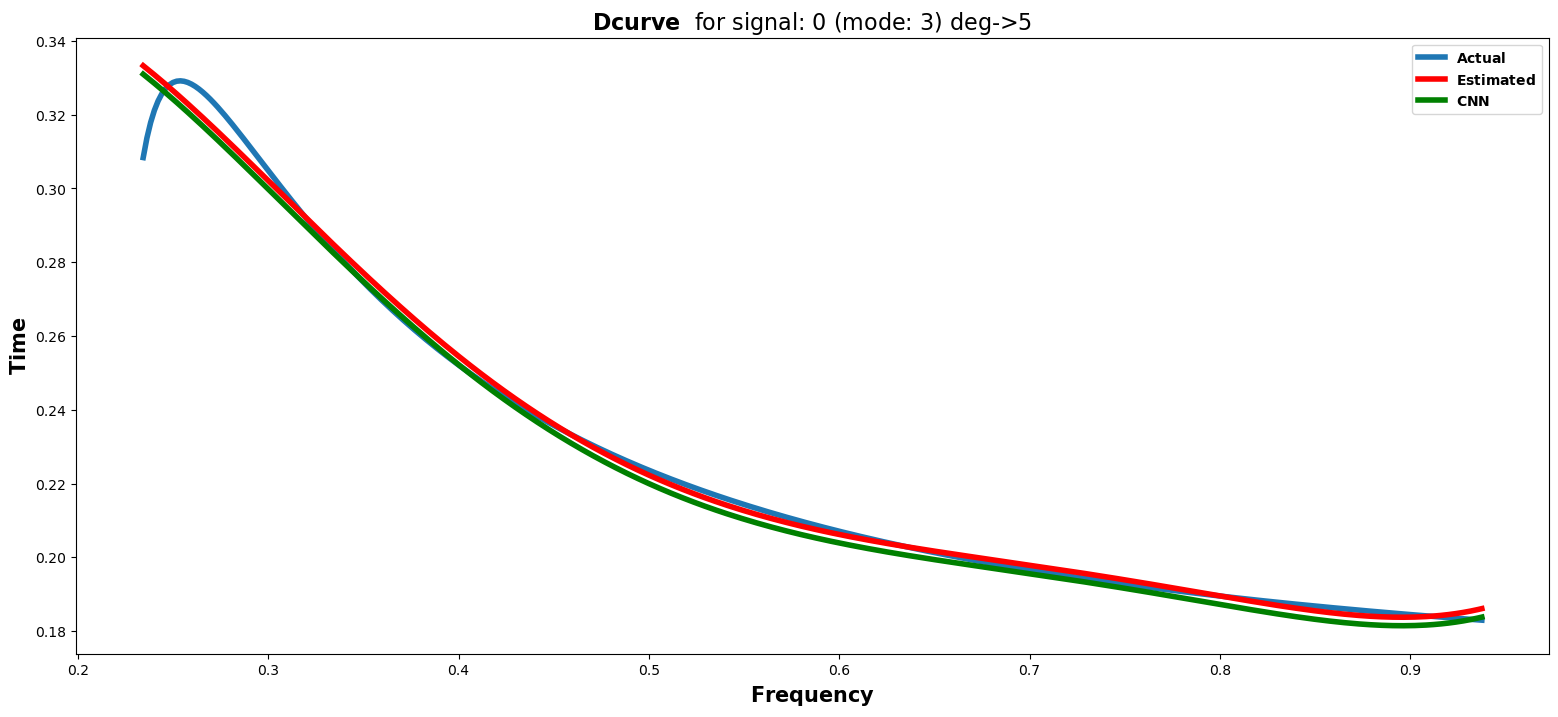

In [441]:
plot_all(0,2,deg=5,plot=True,Rsquare=False,dcurves=Dcurves)


In [423]:
Y_pred_on_X[0]

array([ 0.16762782, -0.02878329,  0.06996681, -0.09263633,  0.07249105,
       -0.01907195,  0.34471527, -1.1687471 ,  3.23897135, -4.70350479,
        3.45474484, -1.02894465,  0.36542668, -0.8902741 ,  1.91004507,
       -2.33127646,  1.48816398, -0.38459592])

In [422]:
Y[0]

array([ 0.17258627, -0.0277554 ,  0.07538643, -0.10557954,  0.07520238,
       -0.02156333,  0.37396787, -1.33393586,  3.75221742, -5.4873459 ,
        4.05503839, -1.1950916 ,  0.40675872, -1.11100557,  2.5854429 ,
       -3.31423594,  2.22231476, -0.60823745])